## Import modules

In [559]:
%load_ext autoreload
%autoreload 2
import pdb
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from surprise.prediction_algorithms.knns import KNNWithMeans
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE
%matplotlib notebook


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [560]:
import nhanes as nhanes

## Settings

In [561]:
DATA_PATH = './CDC_new/NHANES/'
DATASET = 'cancer'

### Note: 
The code below loads each dataset: dataset_features, dataset_targets

Here, all datasets are defined explicitly (see nhanes.py).

In [562]:
ds = nhanes.Dataset(DATA_PATH)
ds.load_cancer()
n_fe = ds.features.shape[1]
n_classes = 2

indx=np.argwhere(ds.targets !=3)
dataset_features = ds.features[indx.flatten()]
dataset_targets = ds.targets[indx.flatten()]

Processing: EPH_F.XPTT                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

Processing: VIQ.XPTPT                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [495]:
dataset_features.shape

(49454, 89)

In [496]:
np.argwhere(np.isnan(ds.features))

ds.feature_names[75]
# len(ds.features[0])

'DMDEDUC3'

In [497]:
np.histogram(dataset_targets,bins=90)

(array([ 4578,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0, 44876]),
 array([0.        , 0.01111111, 0.02222222, 0.03333333, 0.04444444,
        0.05555556, 0.06666667, 0.07777778, 0.08888889, 0.1       ,
        0.11111111, 0.12222222, 0.13333333, 0.14444444, 0.15555556,
        0.16666667, 0.17777778, 0.18888889, 0.2       , 0.21111111,
        0.222222

In [498]:
idx_cancer = np.where(dataset_targets == 0)
features_cancer = dataset_features[idx_cancer]
mi = mutual_info_classif(features_cancer, dataset_targets[idx_cancer])
mi

array([0.00021844, 0.00043687, 0.        , 0.        , 0.        ,
       0.        , 0.00010922, 0.        , 0.        , 0.        ,
       0.00087374, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00054609, 0.        , 0.00021844,
       0.00032765, 0.00021844, 0.        , 0.00021844, 0.00032765,
       0.00021844, 0.        , 0.00010922, 0.        , 0.        ,
       0.00054609, 0.00010922, 0.        , 0.00021844, 0.00021844,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00010922, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00032765, 0.00109218, 0.        , 0.        ,
       0.00010922, 0.        , 0.        , 0.        , 0.        ,
       0.00043687, 0.00065531, 0.        , 0.        , 0.00054609,
       0.00043687, 0.00054609, 0.00131062, 0.        , 0.00010922,
       0.00010922, 0.        , 0.        , 0.        , 0.     

<IPython.core.display.Javascript object>


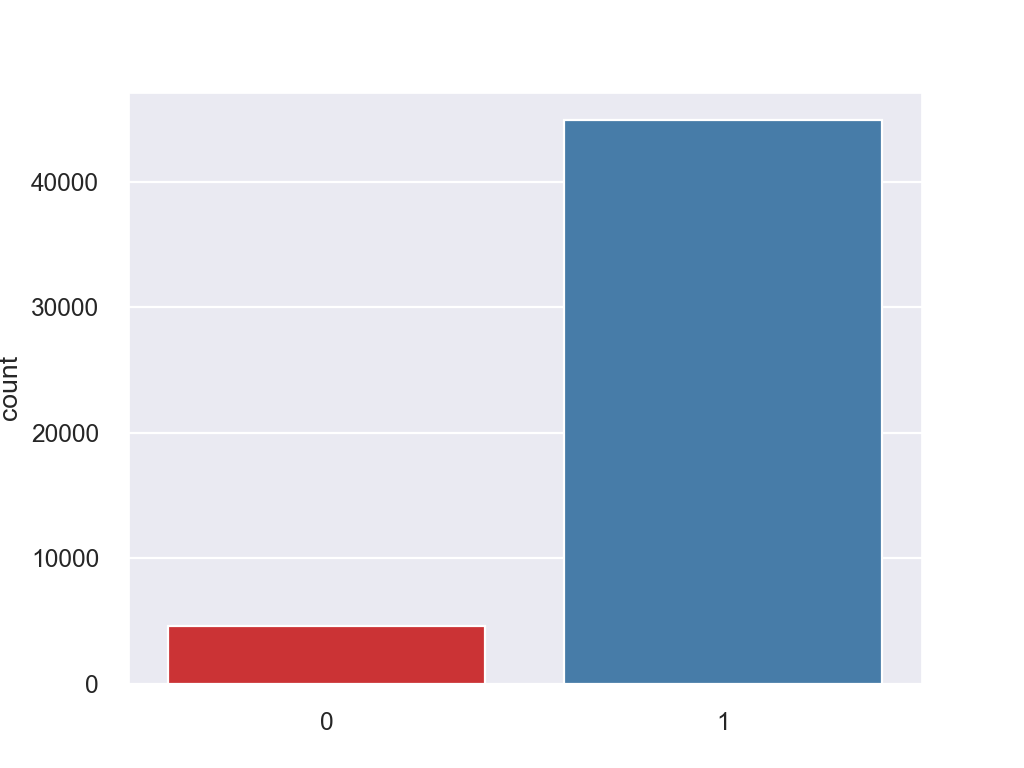

(array([62.,  9.,  4.,  4.,  6.,  0.,  1.,  0.,  1.,  2.]),
 array([0.        , 0.00013106, 0.00026212, 0.00039318, 0.00052425,
        0.00065531, 0.00078637, 0.00091743, 0.00104849, 0.00117955,
        0.00131062]),
 <a list of 10 Patch objects>)

In [499]:
plt.figure()
plt.hist(mi)

In [443]:
dataset_targets

array([1, 1, 1, ..., 1, 1, 1])

In [500]:
sns.set(style="darkgrid")
sns.countplot(dataset_targets,palette="Set1")

In [501]:
df = pd.DataFrame(dataset_features)

normal = df[dataset_targets == 1]
cancer = df[dataset_targets == 0]

print(normal.shape)
print(cancer.shape)

(44876, 89)
(4578, 89)


In [502]:
c=cancer.describe()
c

0            1            2            3            4   \
count  4578.000000  4578.000000  4578.000000  4578.000000  4578.000000   
mean      0.472477     0.527523     1.423367     0.022936     0.027741   
std       0.499296     0.499296     0.586409     0.149715     0.164249   
min       0.000000     0.000000    -0.434611     0.000000     0.000000   
25%       0.000000     0.000000     1.093723     0.000000     0.000000   
50%       0.000000     1.000000     1.576355     0.000000     0.000000   
75%       1.000000     1.000000     1.938329     0.000000     0.000000   
max       1.000000     1.000000     2.179645     1.000000     1.000000   

                5            6            7            8            9   ...  \
count  4578.000000  4578.000000  4578.000000  4578.000000  4578.000000  ...   
mean      0.217999     0.653997     0.052643     0.014854     0.009830  ...   
std       0.412932     0.475746     0.223344     0.120980     0.098667  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       0.000000     1.000000     0.000000     0.000000     0.000000  ...   
75%       0.000000     1.000000     0.000000     0.000000     0.000000  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

                79           80           81            82           83  \
count  4578.000000  4578.000000  4578.000000  4.578000e+03  4578.000000   
mean      0.018785     0.763434    -0.706375 -3.952094e-01    -0.356435   
std       0.135782     0.425020     1.371208  1.495018e+00     1.616724   
min       0.000000     0.000000    -1.925925 -1.962338e+00    -3.511954   
25%       0.000000     1.000000    -1.925925 -1.962338e+00     0.207452   
50%       0.000000     1.000000    -1.925925 -1.388746e-15     0.207452   
75%       0.000000     1.000000     0.837613  1.164840e+00     0.207452   
max       1.000000     1.000000     0.837613  1.164840e+00     3.926858   

                84            85            86            87           88  
count  4578.000000  4.578000e+03  4.578000e+03  4.578000e+03  4578.000000  
mean     -0.050076 -1.948911e-15  1.839302e-01 -3.251909e-02    -0.172210  
std       1.102613  0.000000e+00  1.274622e+00  1.476723e+00     1.602099  
min      -3.516333 -1.948911e-15 -2.871713e+00 -5.947472e+00    -5.964597  
25%       0.339479 -1.948911e-15 -1.648283e-15  1.390698e-15     0.000000  
50%       0.339479 -1.948911e-15 -1.648283e-15  1.390698e-15     0.479901  
75%       0.339479 -1.948911e-15 -1.648283e-15  1.390698e-15     0.479901  
max       0.339479 -1.948911e-15  1.967047e+01  6.578822e+00     0.479901  

[8 rows x 89 columns]

In [503]:
n=normal.describe()
n

0             1             2             3             4   \
count  44876.000000  44876.000000  44876.000000  44876.000000  44876.000000   
mean       0.480992      0.519008      0.693614      0.048935      0.038417   
std        0.499644      0.499644      0.724800      0.215734      0.192203   
min        0.000000      0.000000     -0.434611      0.000000      0.000000   
25%        0.000000      0.000000      0.088240      0.000000      0.000000   
50%        0.000000      1.000000      0.611091      0.000000      0.000000   
75%        1.000000      1.000000      1.254600      0.000000      0.000000   
max        1.000000      1.000000      2.179645      1.000000      1.000000   

                 5             6             7             8             9   \
count  44876.000000  44876.000000  44876.000000  44876.000000  44876.000000   
mean       0.119730      0.655651      0.079976      0.046372      0.010919   
std        0.324649      0.475161      0.271259      0.210292      0.103923   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      1.000000      0.000000      0.000000      0.000000   
75%        0.000000      1.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       ...            79            80            81            82  \
count  ...  44876.000000  44876.000000  44876.000000  4.487600e+04   
mean   ...      0.026116      0.621691     -0.053732  9.950979e-03   
std    ...      0.159483      0.484971      1.288689  1.327973e+00   
min    ...      0.000000      0.000000     -1.925925 -1.962338e+00   
25%    ...      0.000000      0.000000     -1.925925 -1.962338e+00   
50%    ...      0.000000      1.000000      0.837613 -1.388746e-15   
75%    ...      0.000000      1.000000      0.837613  1.164840e+00   
max    ...      1.000000      1.000000      0.837613  1.164840e+00   

                 83            84            85            86            87  \
count  44876.000000  44876.000000  4.487600e+04  4.487600e+04  4.487600e+04   
mean      -0.137820      0.030749 -1.948911e-15  6.548986e-02 -4.145469e-03   
std        1.284893      0.966763  7.888697e-31  1.296217e+00  1.297601e+00   
min       -3.511954     -3.516333 -1.948911e-15 -3.915601e+00 -5.947472e+00   
25%        0.207452      0.339479 -1.948911e-15 -3.001681e-02  1.390698e-15   
50%        0.207452      0.339479 -1.948911e-15 -1.648283e-15  1.390698e-15   
75%        0.207452      0.339479 -1.948911e-15 -1.648283e-15  1.390698e-15   
max        3.926858      0.339479 -1.948911e-15  2.805638e+01  6.578822e+00   

                 88  
count  44876.000000  
mean      -0.010994  
std        1.304843  
min       -5.964597  
25%        0.000000  
50%        0.479901  
75%        0.479901  
max        0.479901  

[8 rows x 89 columns]

In [504]:

corr = df.corr()


<IPython.core.display.Javascript object>


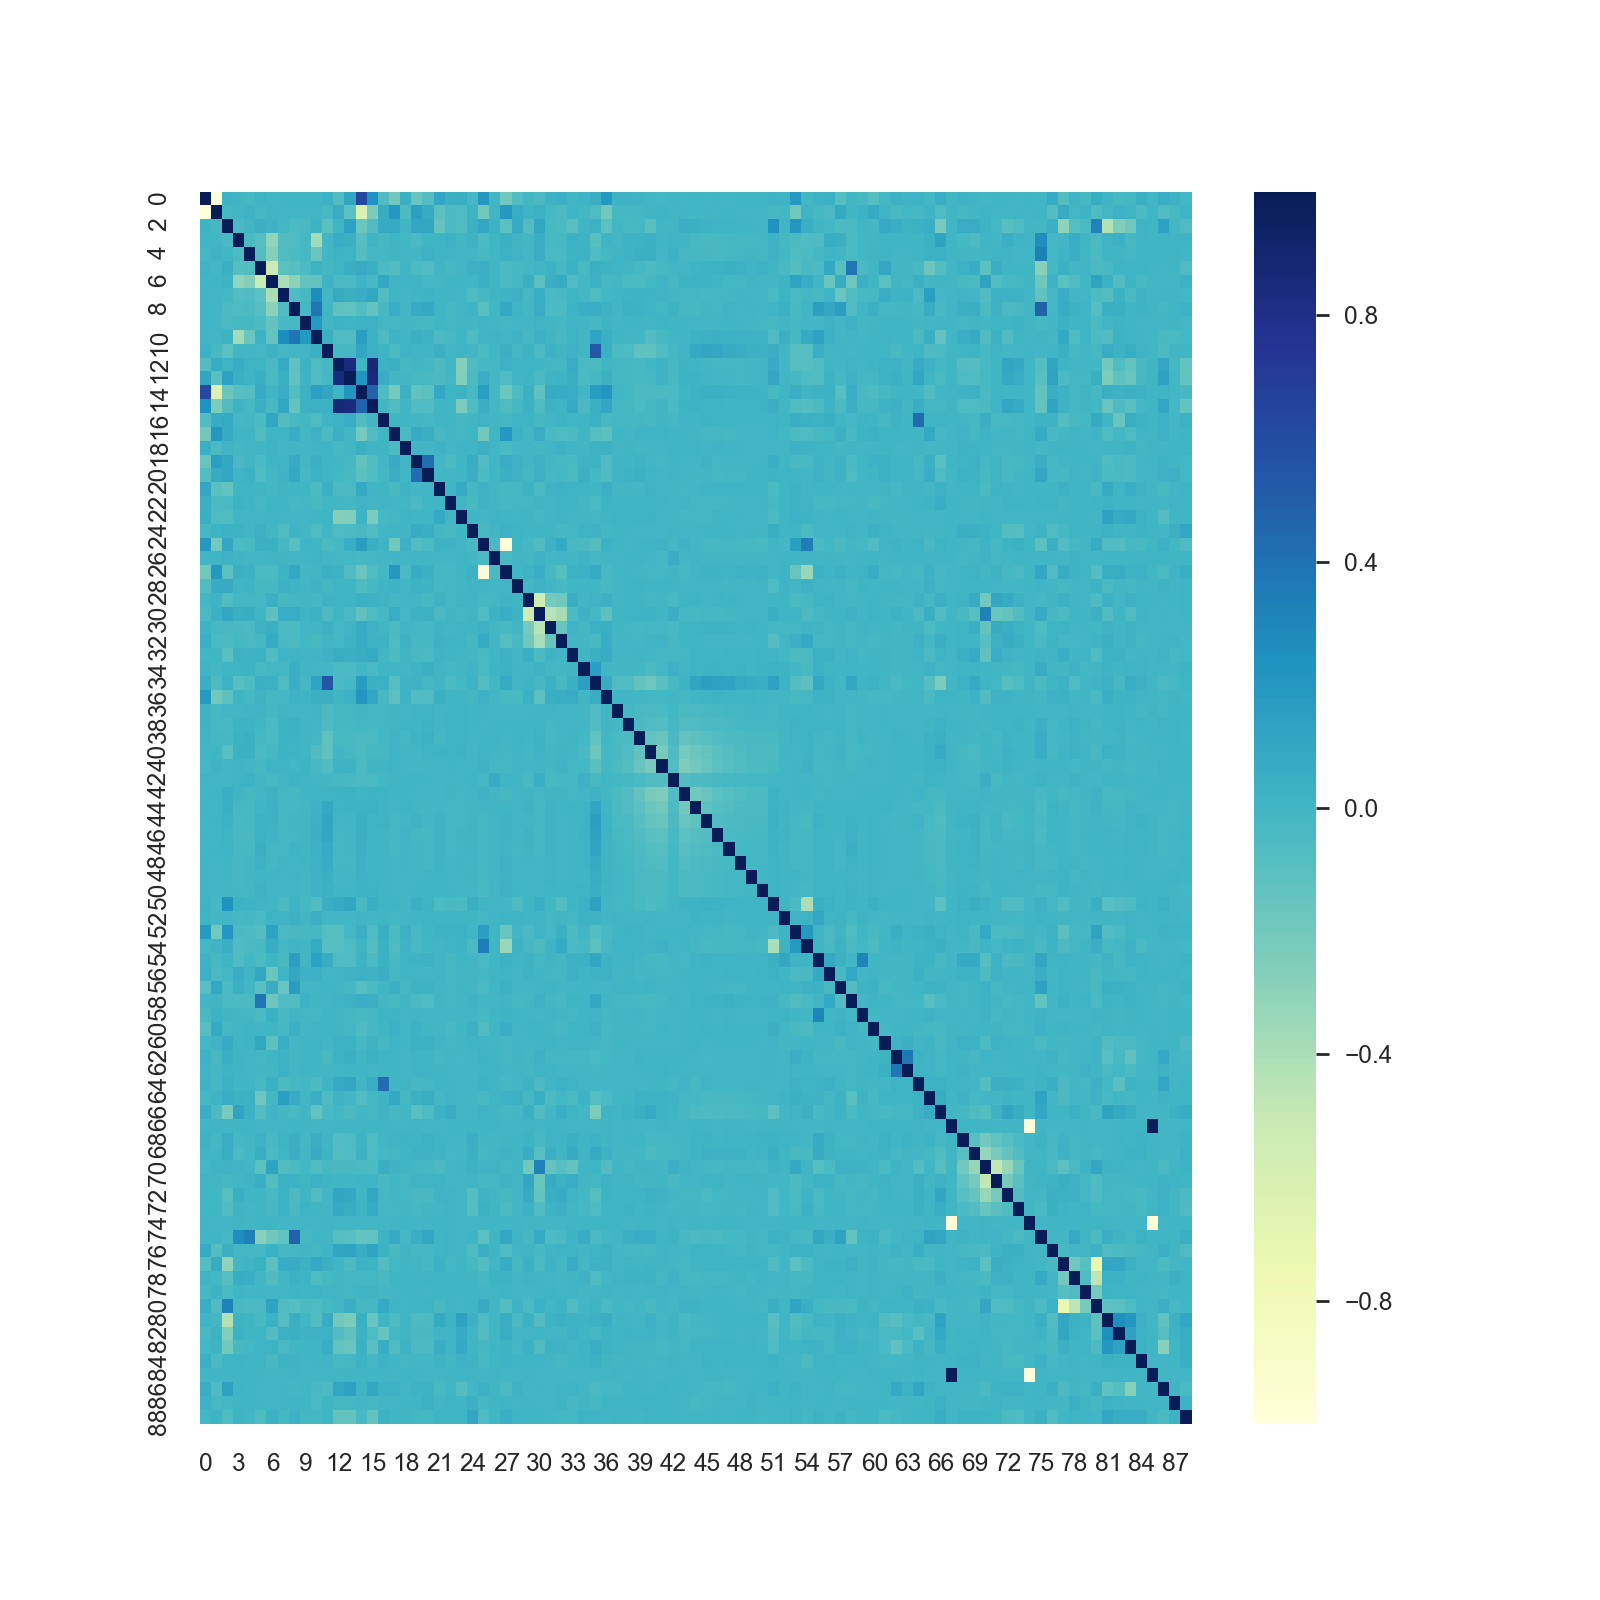

In [505]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap="YlGnBu")


In [464]:
corr.style.background_gradient(cmap='coolwarm')
#pd.DataFrame.to_latex(corr)


## Train/Test Separation

In [567]:
perm = np.random.permutation(dataset_targets.shape[0])
dataset_features = dataset_features[perm]
dataset_targets = dataset_targets[perm]

def get_batch(n_size, phase):
    # select indices
    n_samples = dataset_features.shape[0]
    n_classes = int(dataset_targets.max() + 1)
    if phase == 'test':
        inds_sel = np.arange(0, int(n_samples*0.15), 1)
    elif phase == 'validation':
        n_samples = dataset_features.shape[0]
        inds_sel = np.arange(int(n_samples*0.15), int(n_samples*0.30), 1)
    elif phase == 'train':
        n_samples = dataset_features.shape[0]
        inds_sel = np.arange(int(n_samples*0.30), n_samples, 1)
    else:
        raise NotImplementedError
    inds_sel = np.random.permutation(inds_sel)
    batch_inds = []
    for cl in range(n_classes):
        inds_cl = inds_sel[dataset_targets[inds_sel] == cl]
        batch_inds.extend(inds_cl[:n_size//n_classes])
    batch_inds = np.random.permutation(batch_inds)
    
    return dataset_features[batch_inds], dataset_targets[batch_inds]
    
features_trn, targets_trn = get_batch(n_size=10000, phase='train')
features_tst, targets_tst = get_batch(n_size=5000, phase='test')

unb_features_trn, unb_features_tst ,unb_targets_trn, unb_targets_tst= train_test_split(dataset_features,dataset_targets,test_size=0.33, random_state=42)




In [568]:
unb_features_tst.shape


(16320, 89)

## Classification

In [508]:
#balanced dataset
clf = RandomForestClassifier(n_estimators=10)
clf.fit(features_trn, targets_trn)
preds_tst = clf.predict(features_tst)
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_RFC', accu)


accu_tst_RFC 0.7223276407337128


              precision    recall  f1-score   support

           0       0.39      0.61      0.48       662
           1       0.88      0.75      0.81      2500

   micro avg       0.72      0.72      0.72      3162
   macro avg       0.64      0.68      0.65      3162
weighted avg       0.78      0.72      0.74      3162



<IPython.core.display.Javascript object>


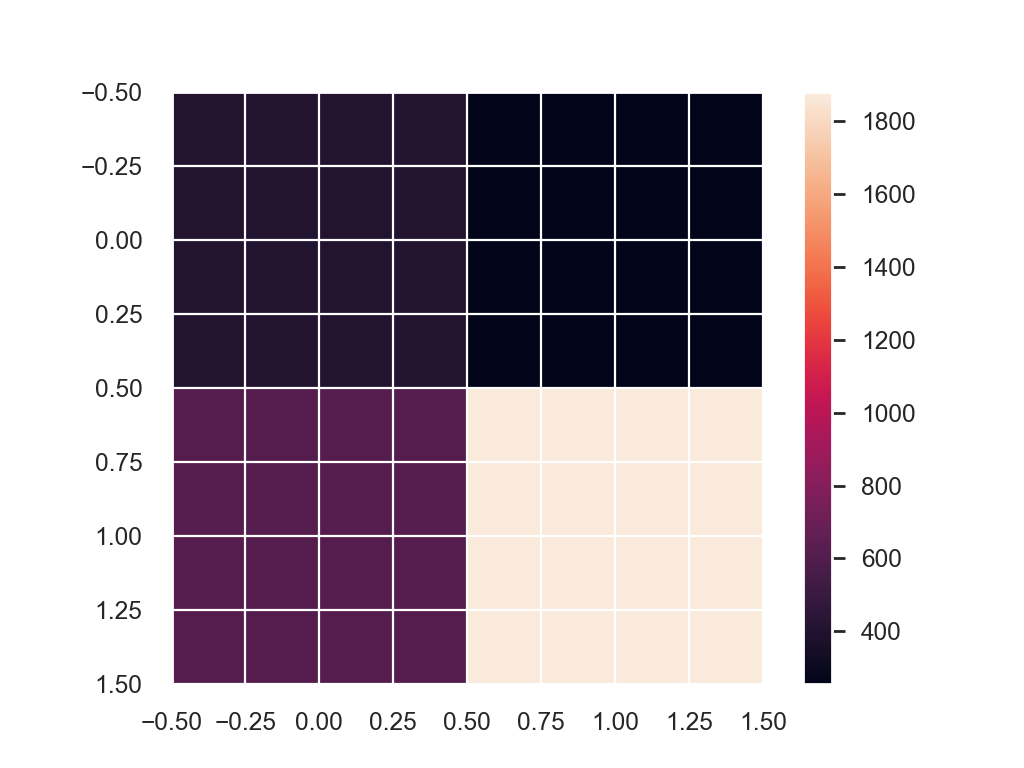

<IPython.core.display.Javascript object>


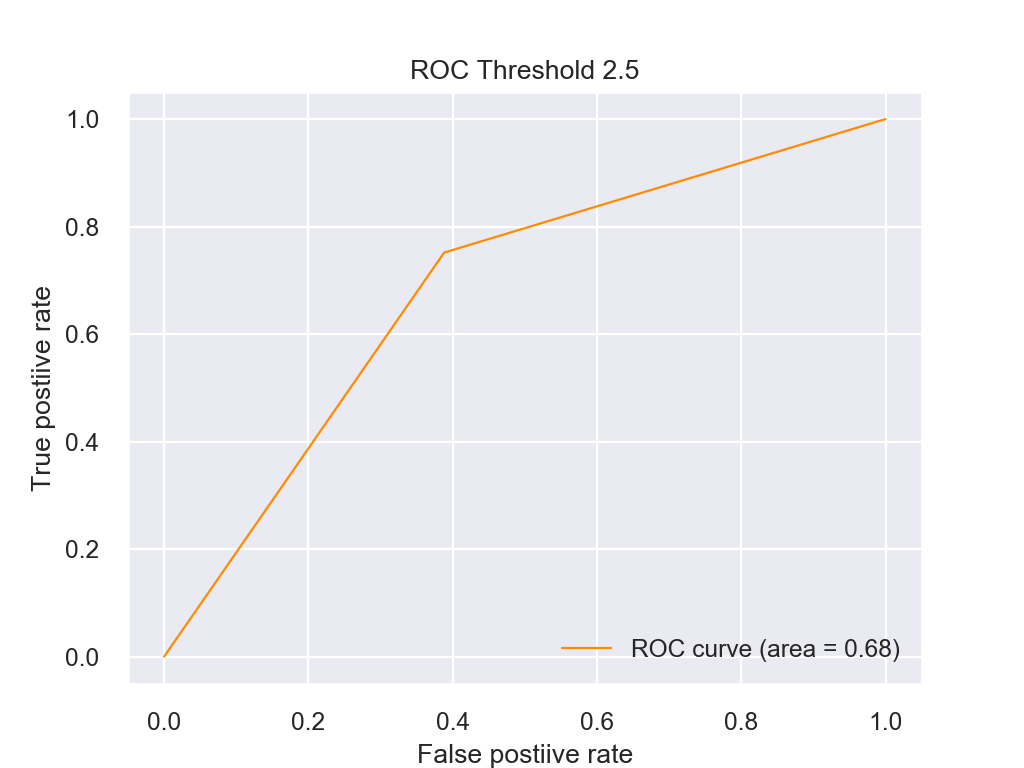

In [509]:
print(classification_report(targets_tst,preds_tst))
visualize(targets_tst,preds_tst)

In [469]:
clf = SVC(kernel='rbf')
#clf = SVC(kernel='linear')
#clf = SVC(kernel='poly')
clf.fit(features_trn, targets_trn)
preds_tst = clf.predict(features_tst)
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_SVC', accu)


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accu_tst_SVC 0.7383059418457648


              precision    recall  f1-score   support

           0       0.39      0.61      0.48       662
           1       0.88      0.75      0.81      2500

   micro avg       0.72      0.72      0.72      3162
   macro avg       0.64      0.68      0.65      3162
weighted avg       0.78      0.72      0.74      3162



<IPython.core.display.Javascript object>


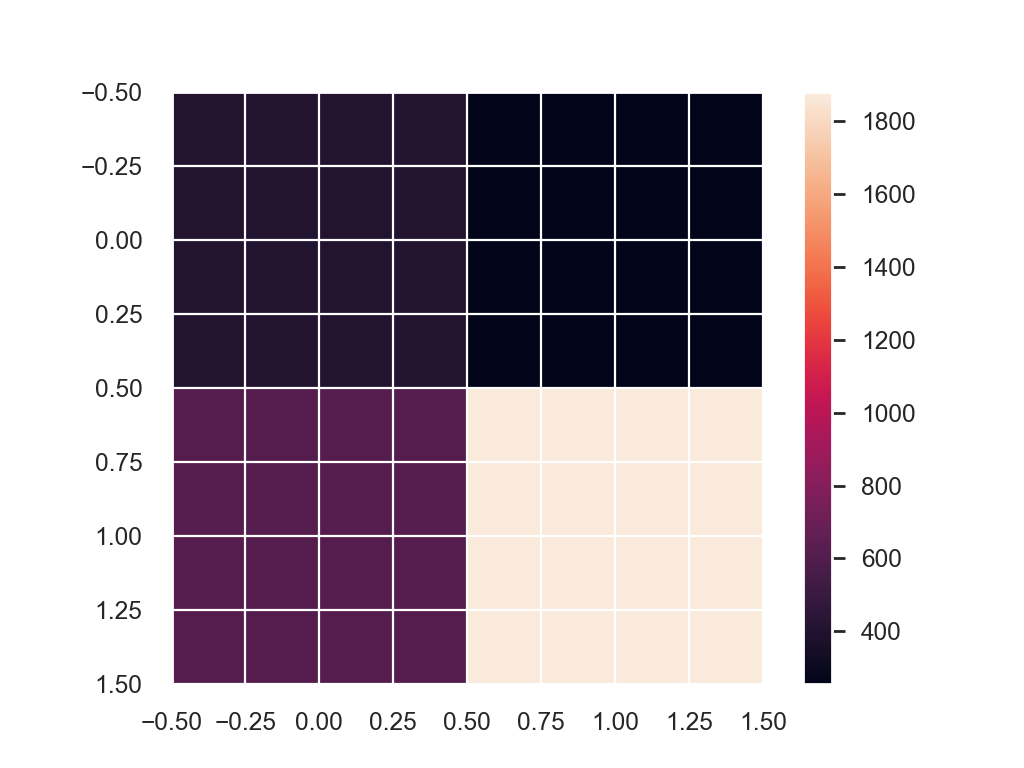

<IPython.core.display.Javascript object>


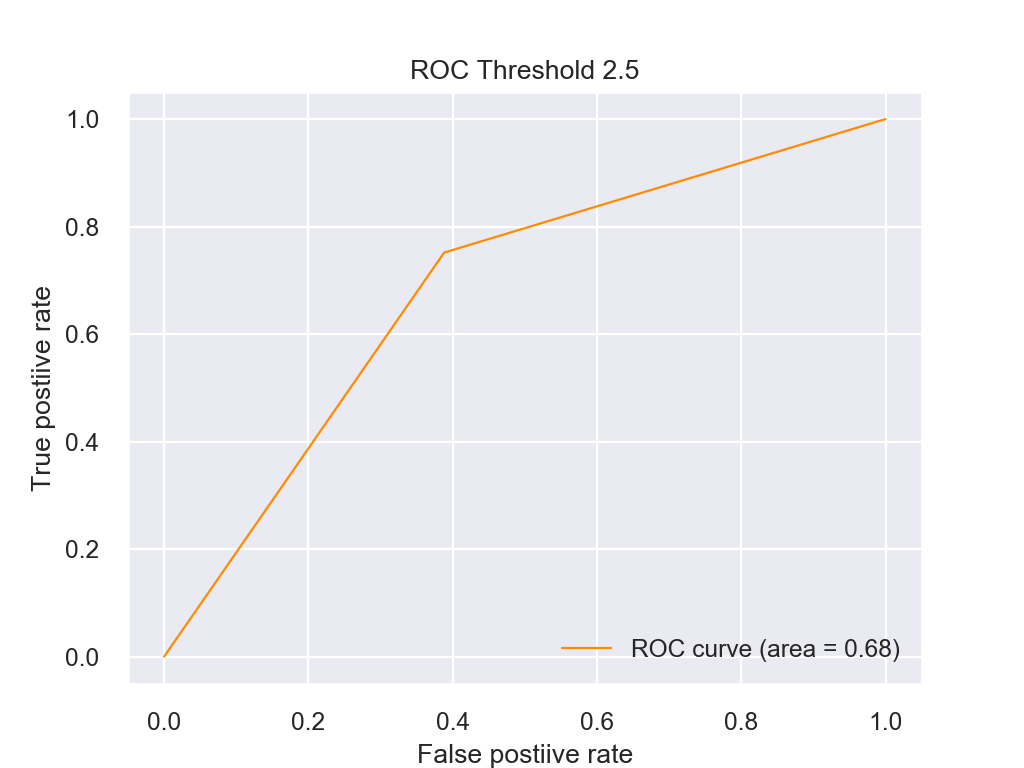

In [510]:
print(classification_report(targets_tst,preds_tst))
visualize(targets_tst,preds_tst)

In [511]:
from sklearn.ensemble import AdaBoostClassifier
#clf = AdaBoostClassifier(LogisticRegression(solver='lbfgs', max_iter=200),n_estimators=50,random_state=42)
clf = AdaBoostClassifier(n_estimators=50,random_state=42)
clf.fit(features_trn, targets_trn)
preds_tst = clf.predict(features_tst)
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_SVC', accu)

accu_tst_SVC 0.7647058823529411


              precision    recall  f1-score   support

           0       0.46      0.65      0.54       662
           1       0.90      0.80      0.84      2500

   micro avg       0.76      0.76      0.76      3162
   macro avg       0.68      0.72      0.69      3162
weighted avg       0.80      0.76      0.78      3162



<IPython.core.display.Javascript object>


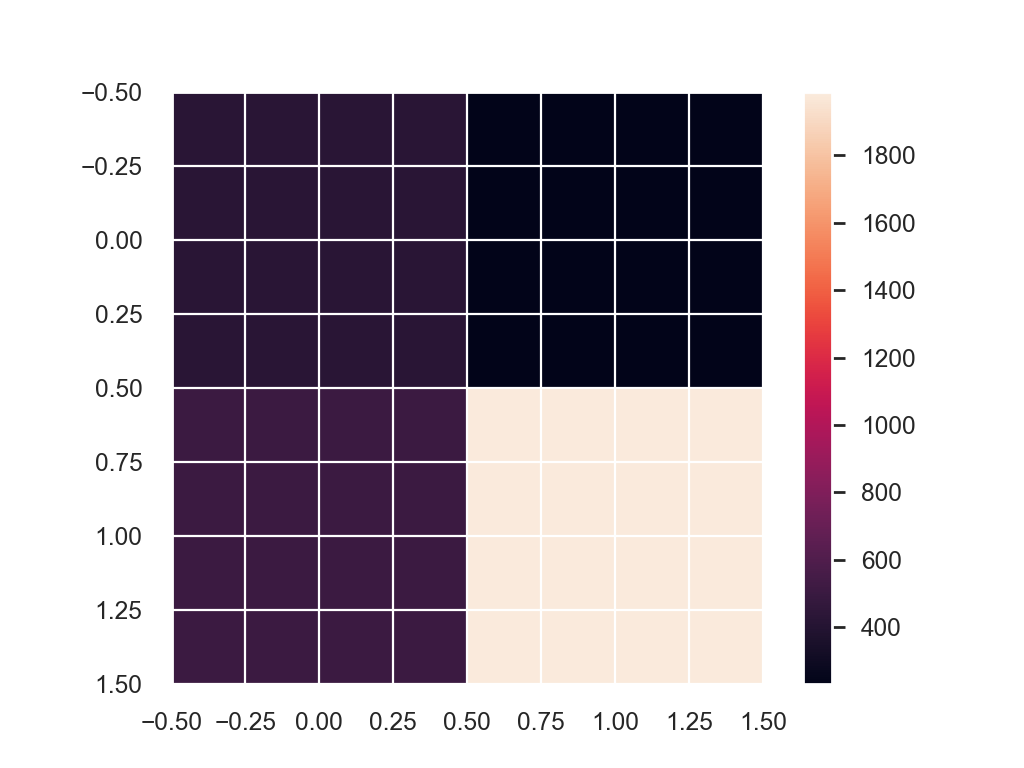

<IPython.core.display.Javascript object>


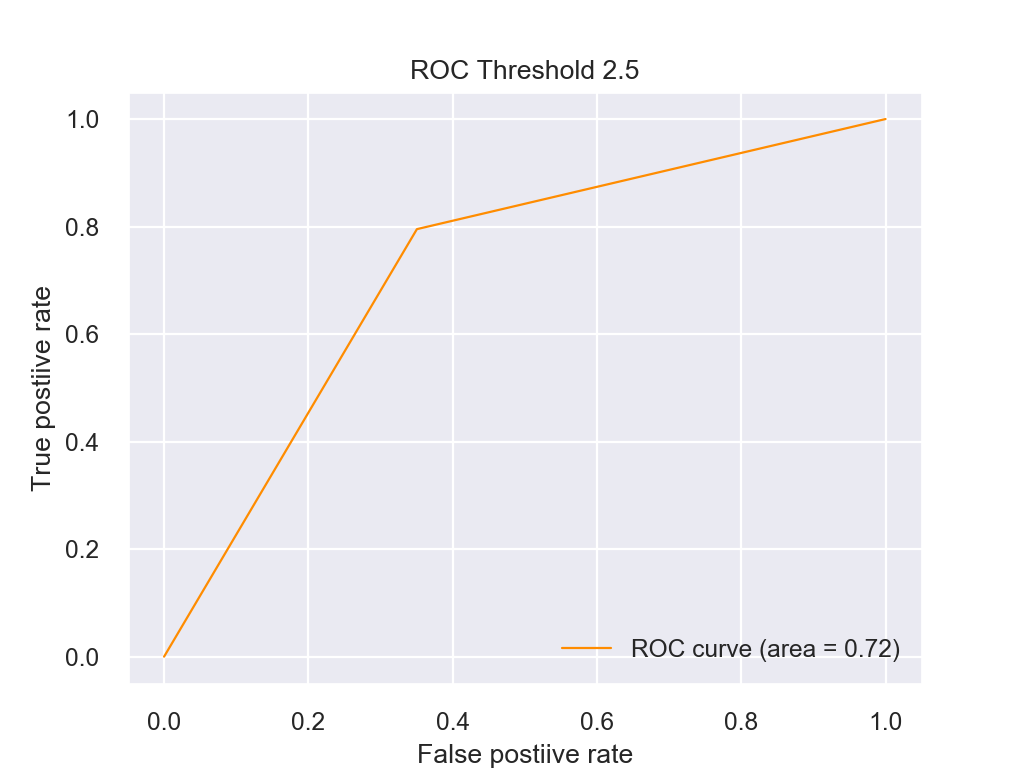

In [512]:
print(classification_report(targets_tst,preds_tst))
visualize(targets_tst,preds_tst)

In [513]:
clf = GaussianNB(priors=None)
clf.fit(features_trn, targets_trn)
preds_tst = clf.predict(features_tst)
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_SVC', accu)


accu_tst_SVC 0.6192283364958887


              precision    recall  f1-score   support

           0       0.32      0.76      0.45       662
           1       0.90      0.58      0.71      2500

   micro avg       0.62      0.62      0.62      3162
   macro avg       0.61      0.67      0.58      3162
weighted avg       0.78      0.62      0.65      3162



<IPython.core.display.Javascript object>


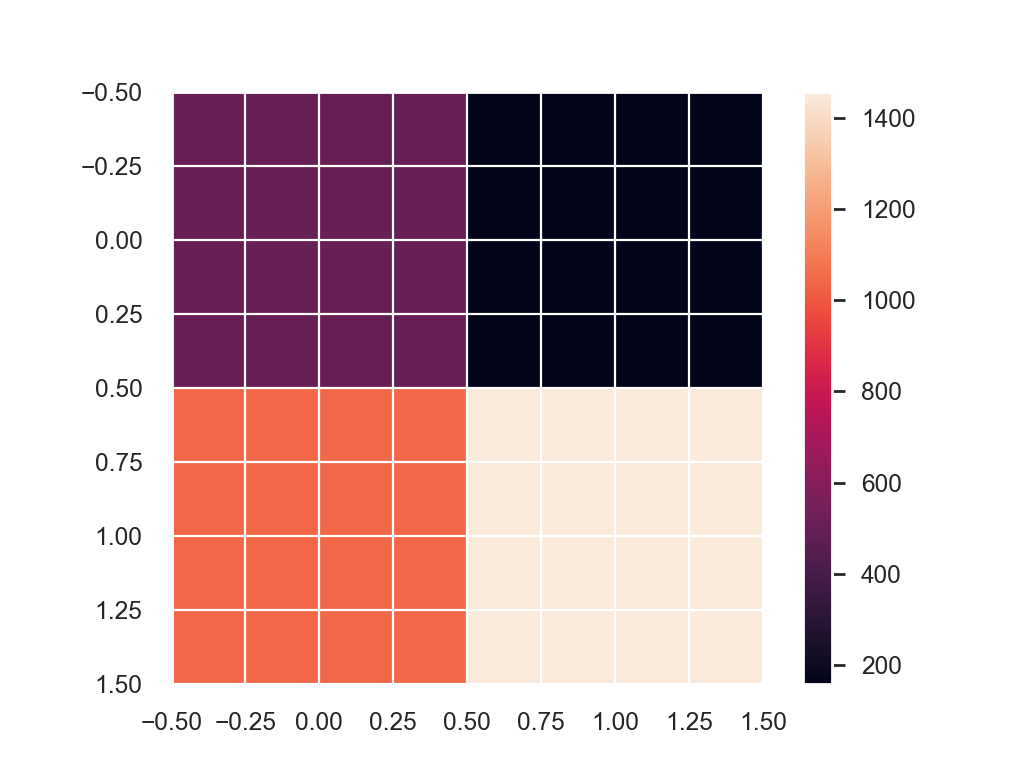

<IPython.core.display.Javascript object>


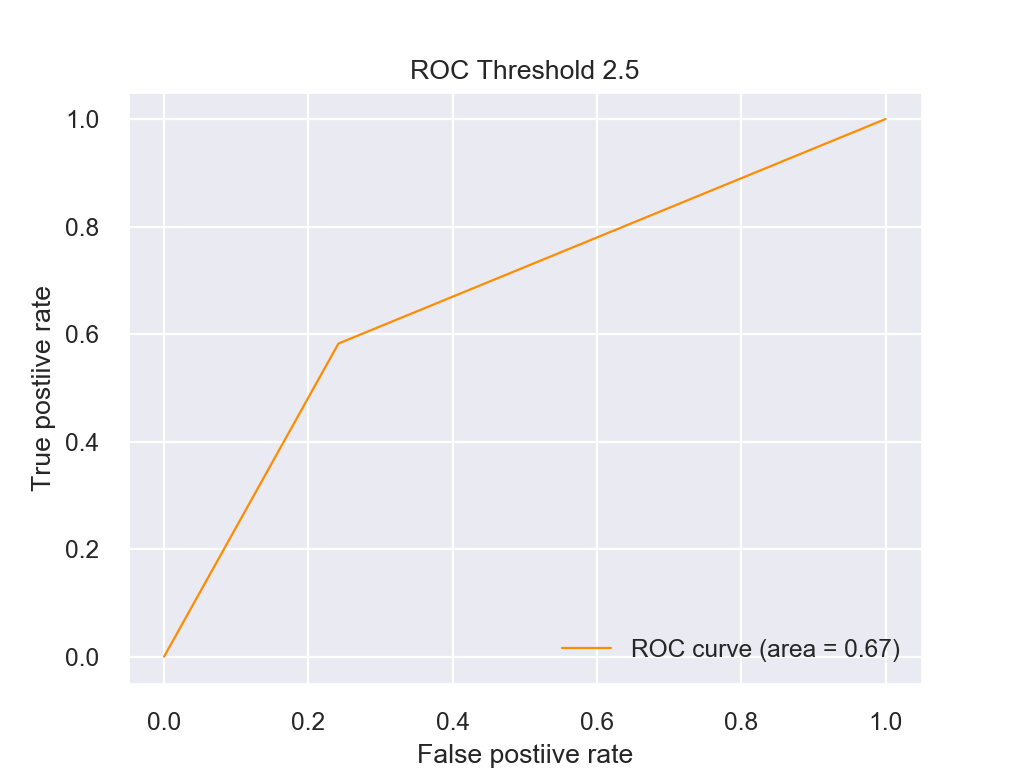

In [514]:
print(classification_report(targets_tst,preds_tst))
visualize(targets_tst,preds_tst)

In [515]:
clf = LogisticRegression(solver='lbfgs', max_iter=200)
clf.fit(features_trn, targets_trn)
preds_tst = clf.predict(features_tst)
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_LR', accu)


accu_tst_LR 0.7536369386464263


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.44      0.64      0.52       662
           1       0.89      0.78      0.83      2500

   micro avg       0.75      0.75      0.75      3162
   macro avg       0.67      0.71      0.68      3162
weighted avg       0.80      0.75      0.77      3162



<IPython.core.display.Javascript object>


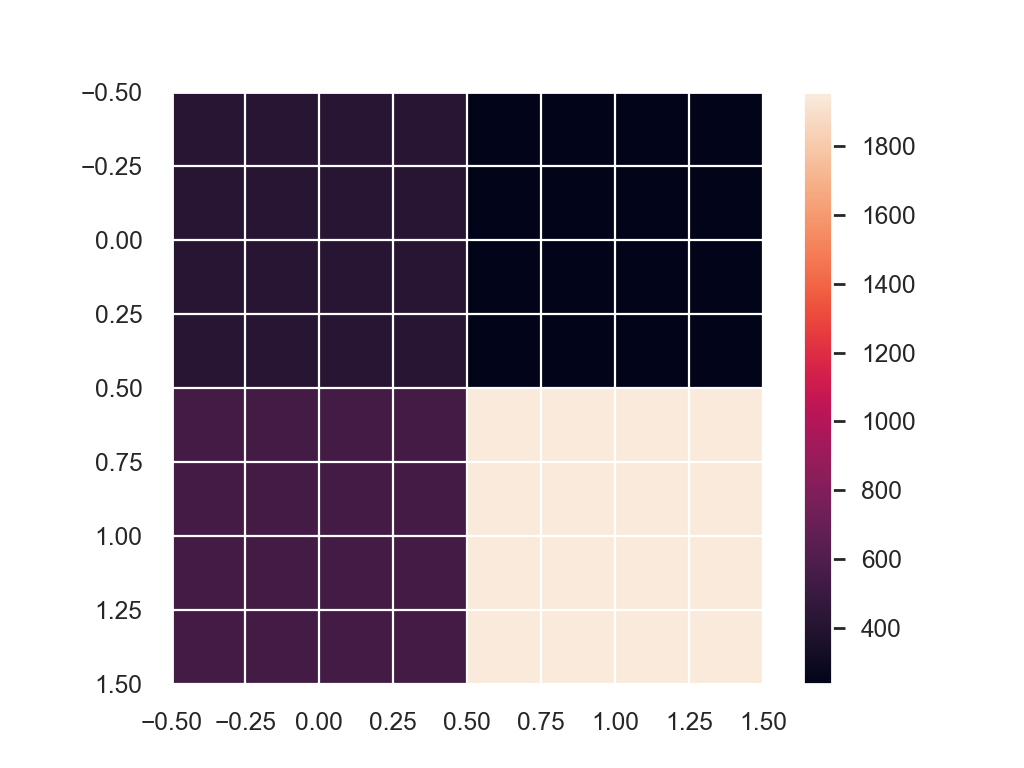

<IPython.core.display.Javascript object>


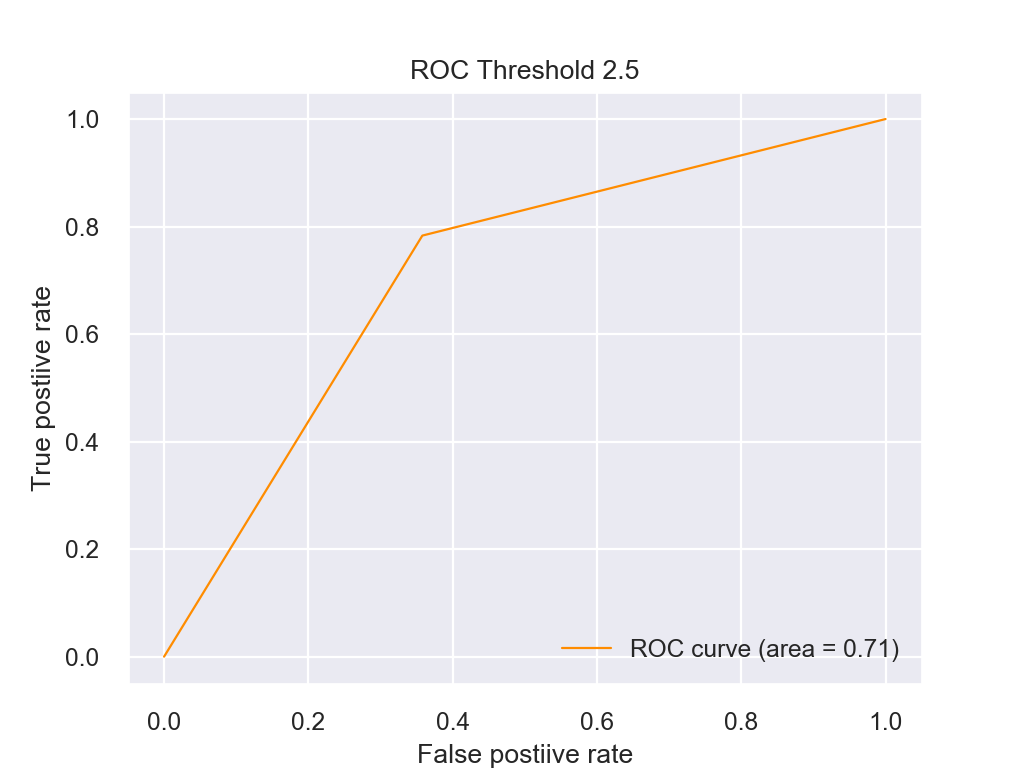

In [516]:
print(classification_report(targets_tst,preds_tst))
visualize(targets_tst,preds_tst)

In [517]:
from sklearn.feature_selection import RFE
rfe = RFE(clf, 20)
rfe = rfe.fit(features_trn, targets_trn)
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[ True  True  True False  True  True  True False  True  True False False
 False False  True False False False False False False False False False
 False  True  True False False False False False False False False False
 False False  True False False False False False  True False  True  True
 False False  True False False False False False False False False False
  True  True False False False  True  True False False False False False
 False False False False False False False False False False False False
 False False False False False]
[ 1  1  1 52  1  1  1  7  1  1 20 54  9 13  1  8 39 18 47 11 10 49 53 23
 64  1  1  6 46 35 51 50 63 68 67 16 44 14  1 27 19 41 38  3  1  2  1  1
 21 42  1 61 34 60 58 48 37 43 56 66  1  1 30 31  4  1  1 24 33 26  5 57
 45 28 70 29 36 40 22 17 65 15 32 59 12 69 62 55 25]


In [525]:
clf = KMeans(n_clusters=3)
clf.fit(features_trn)
preds_tst = clf.predict(features_tst)
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_KMeans', accu)

accu_tst_KMeans 0.6714104996837444


              precision    recall  f1-score   support

           0       0.14      0.02      0.03       662
           1       0.79      0.85      0.82      2500
           2       0.00      0.00      0.00         0

   micro avg       0.67      0.67      0.67      3162
   macro avg       0.31      0.29      0.28      3162
weighted avg       0.65      0.67      0.65      3162



/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


<IPython.core.display.Javascript object>


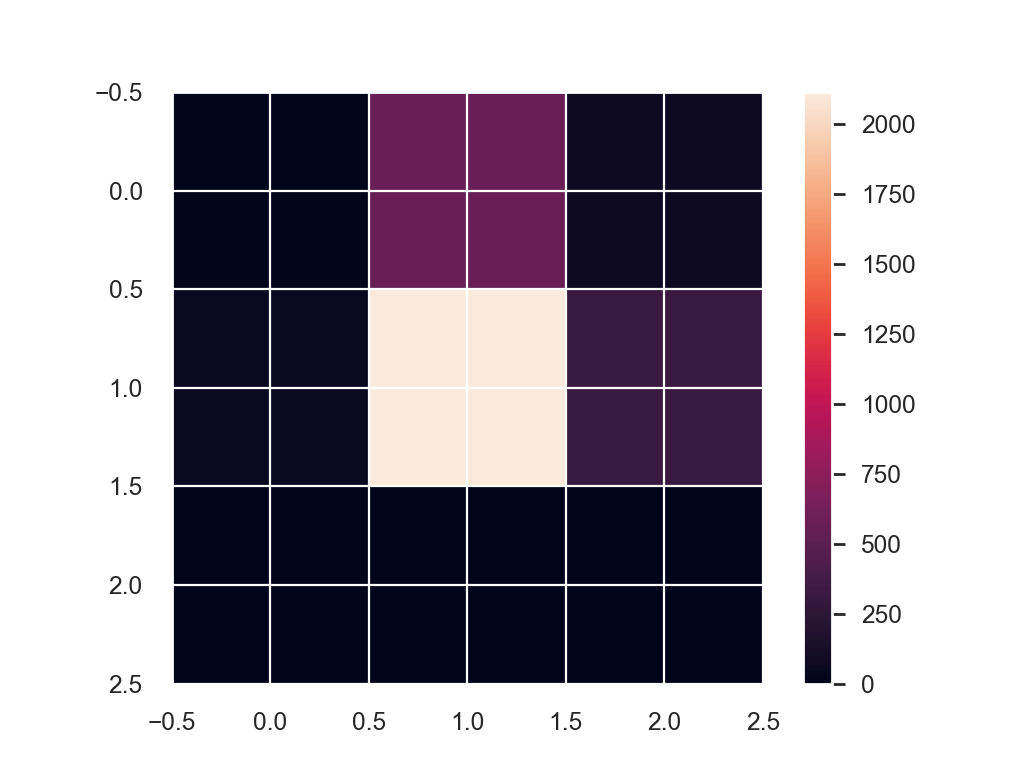

<IPython.core.display.Javascript object>


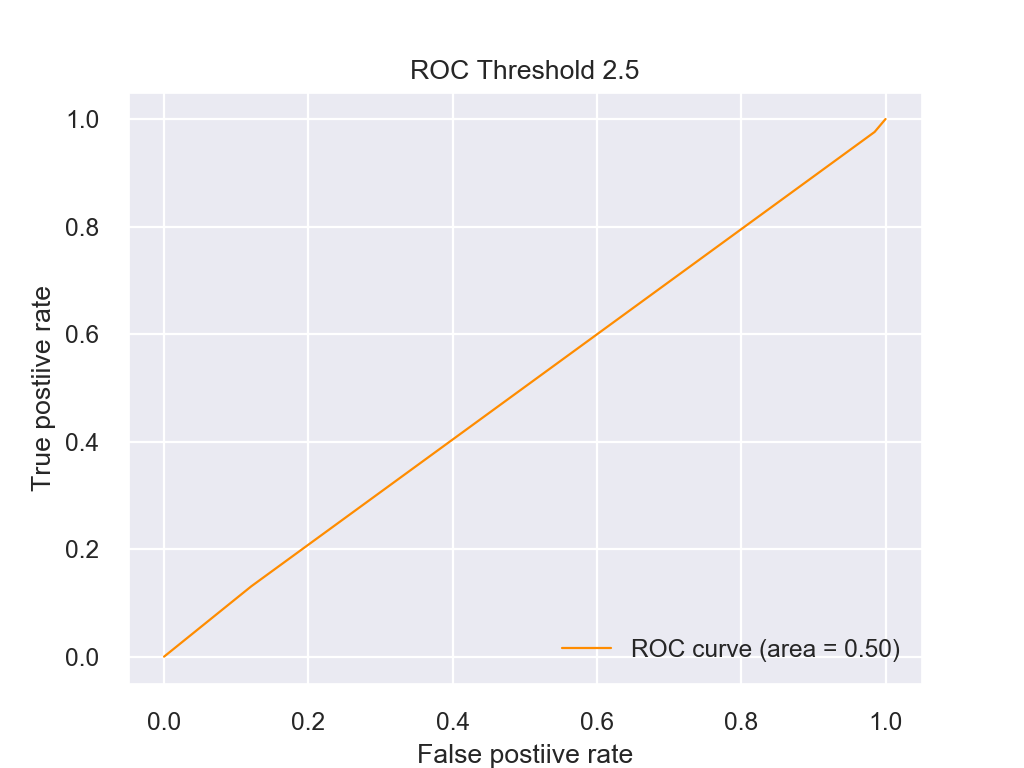

In [526]:
print(classification_report(targets_tst,preds_tst))
visualize(targets_tst,preds_tst)

<IPython.core.display.Javascript object>


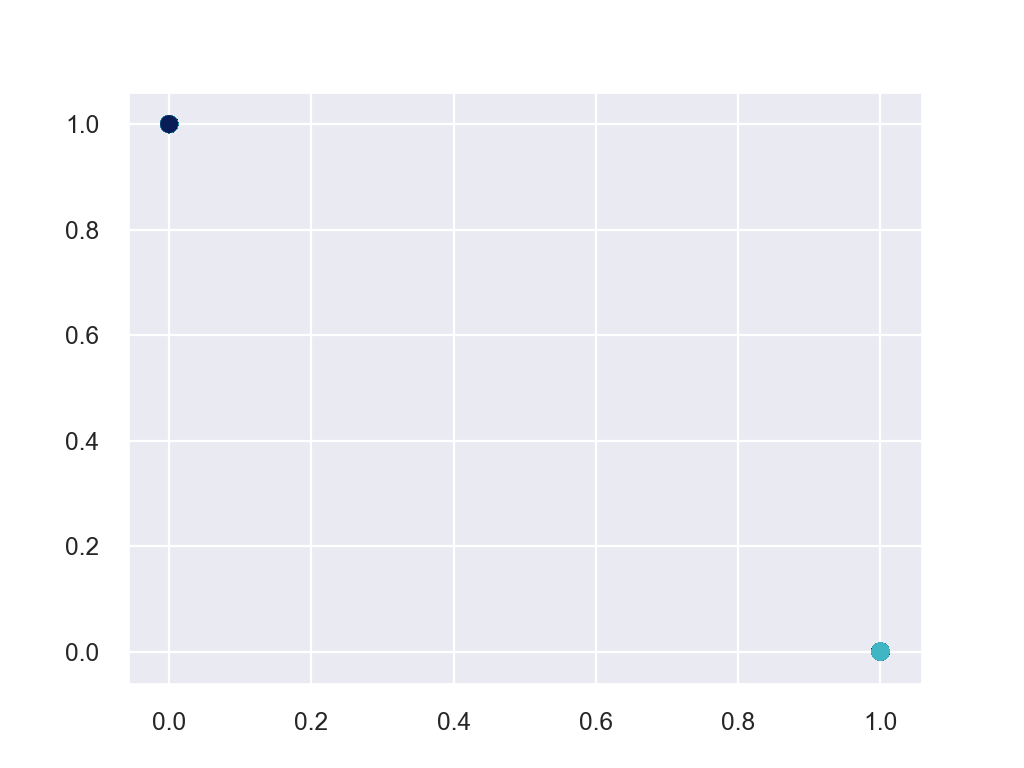

In [527]:
plt.figure()
plt.scatter(features_tst[:, 0], features_tst[:, 1], c=preds_tst, s=50, cmap='YlGnBu')

centers = clf.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

In [534]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(features_trn, targets_trn)
preds_tst = clf.predict(features_tst)
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_RFC', accu)

accu_tst_RFC 0.6698292220113852


              precision    recall  f1-score   support

           0       0.31      0.47      0.37       662
           1       0.84      0.72      0.78      2500

   micro avg       0.67      0.67      0.67      3162
   macro avg       0.57      0.60      0.57      3162
weighted avg       0.73      0.67      0.69      3162



<IPython.core.display.Javascript object>


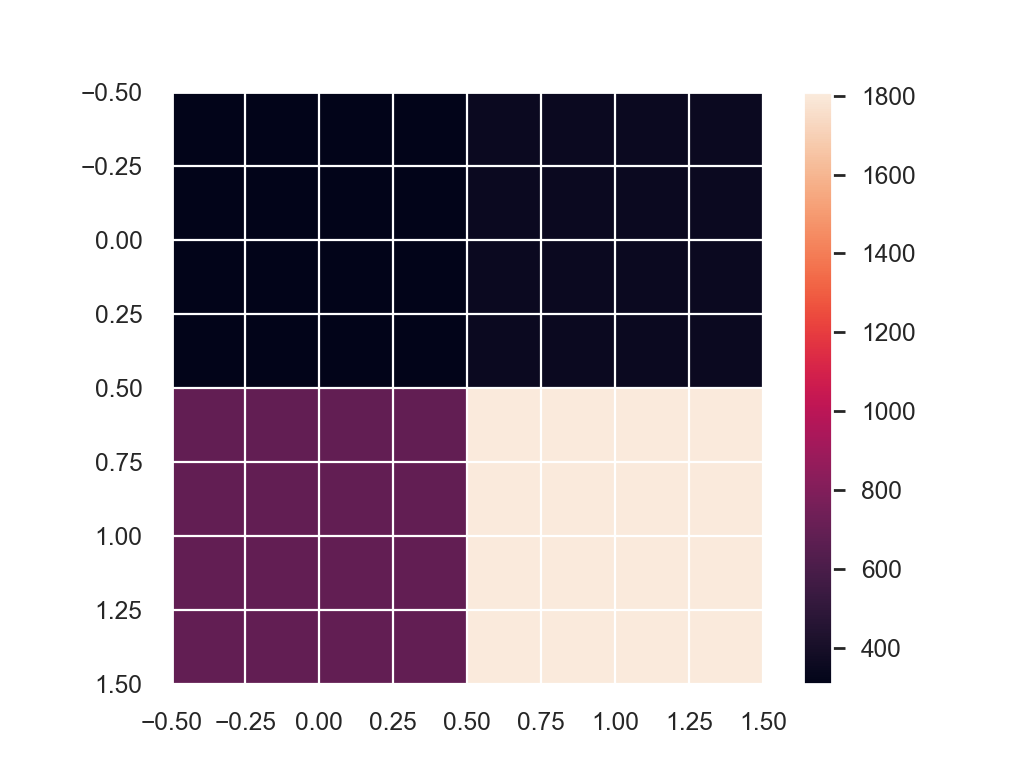

<IPython.core.display.Javascript object>


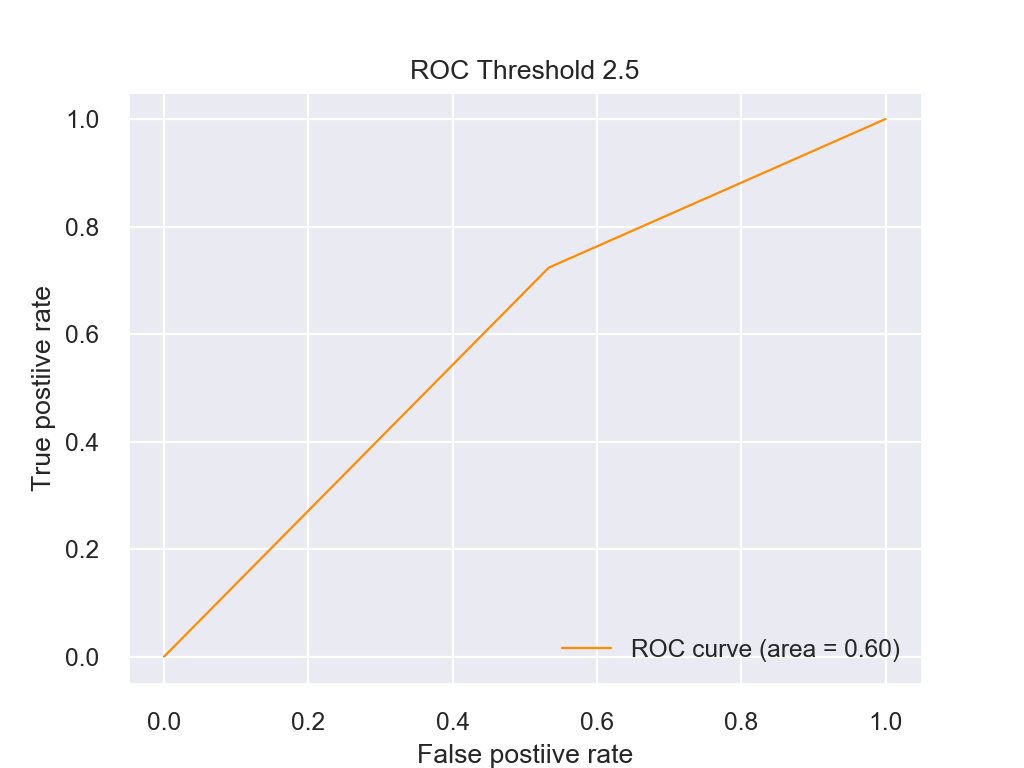

In [535]:
print(classification_report(targets_tst,preds_tst))
visualize(targets_tst,preds_tst)

In [545]:
clf=MLPClassifier(hidden_layer_sizes=(500,200,200,500), activation='relu', solver='adam',
                 max_iter=2000,alpha=0.01,learning_rate_init=5e-7)
clf.fit(features_trn,targets_trn)
preds_tst=clf.predict(features_tst)
preds_tst[preds_tst<0.5] = 0
preds_tst[preds_tst>=0.5] = 1
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_Neural', accu)

accu_tst_Neural 0.7419354838709677


              precision    recall  f1-score   support

           0       0.39      0.42      0.41       662
           1       0.84      0.83      0.84      2500

   micro avg       0.74      0.74      0.74      3162
   macro avg       0.62      0.62      0.62      3162
weighted avg       0.75      0.74      0.75      3162



/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


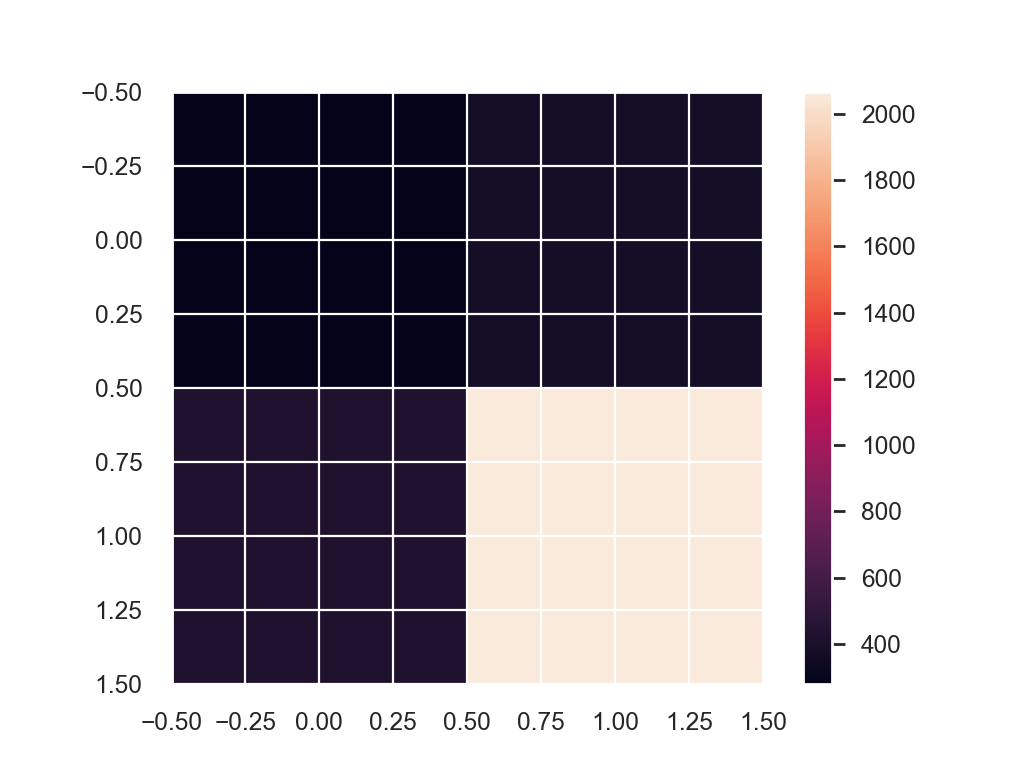

<IPython.core.display.Javascript object>


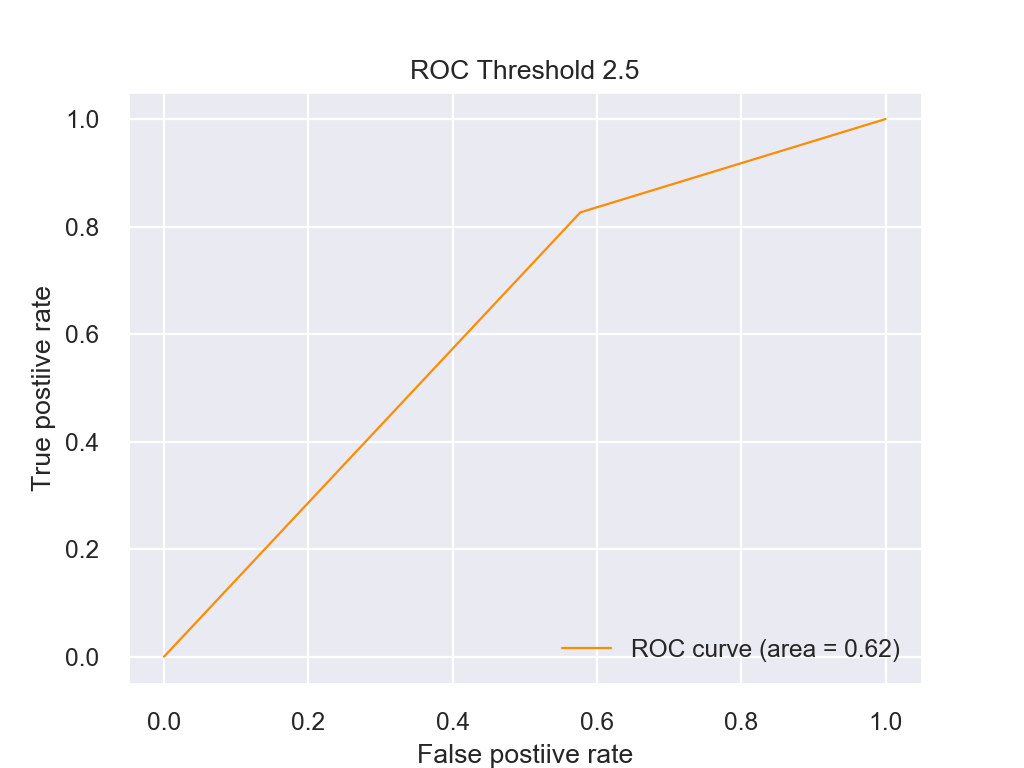

In [546]:
print(classification_report(targets_tst,preds_tst))
visualize(targets_tst,preds_tst)

In [536]:
#unbalanced
clf = RandomForestClassifier(n_estimators=100)
clf.fit(unb_features_trn, unb_targets_trn)
preds_tst = clf.predict(unb_features_tst)
accu = np.mean(preds_tst==unb_targets_tst)
print('accu_tst_RFC', accu)




accu_tst_RFC 0.9068014705882353


              precision    recall  f1-score   support

           0       0.44      0.01      0.01      1519
           1       0.91      1.00      0.95     14801

   micro avg       0.91      0.91      0.91     16320
   macro avg       0.68      0.50      0.48     16320
weighted avg       0.86      0.91      0.86     16320



<IPython.core.display.Javascript object>


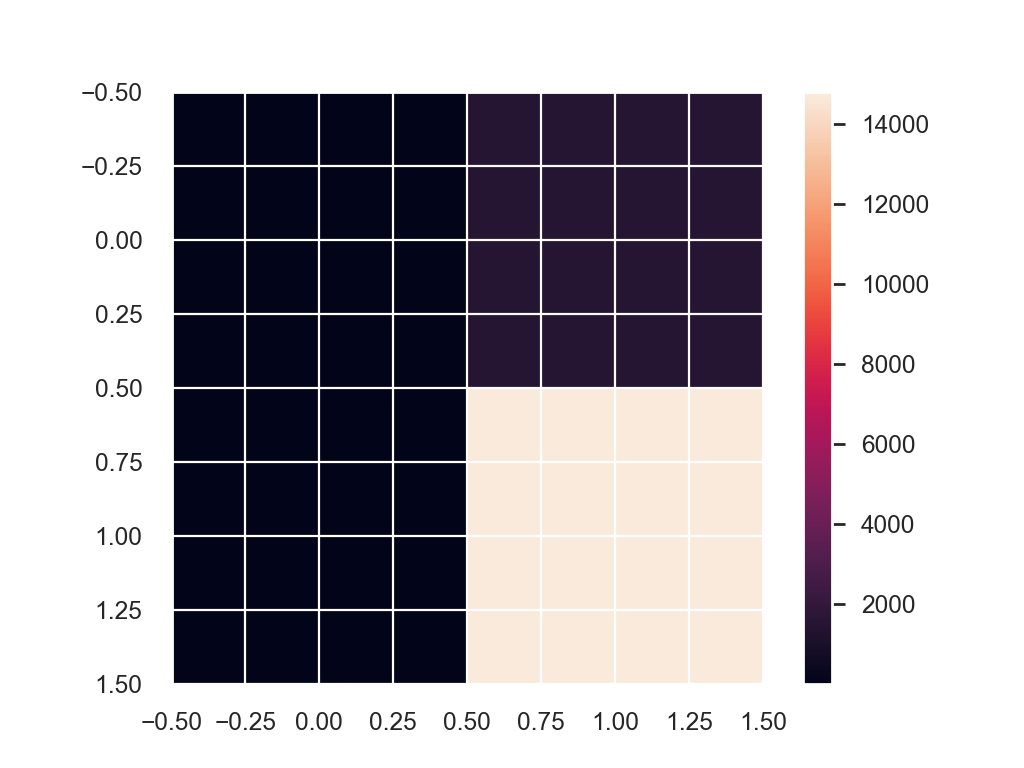

<IPython.core.display.Javascript object>


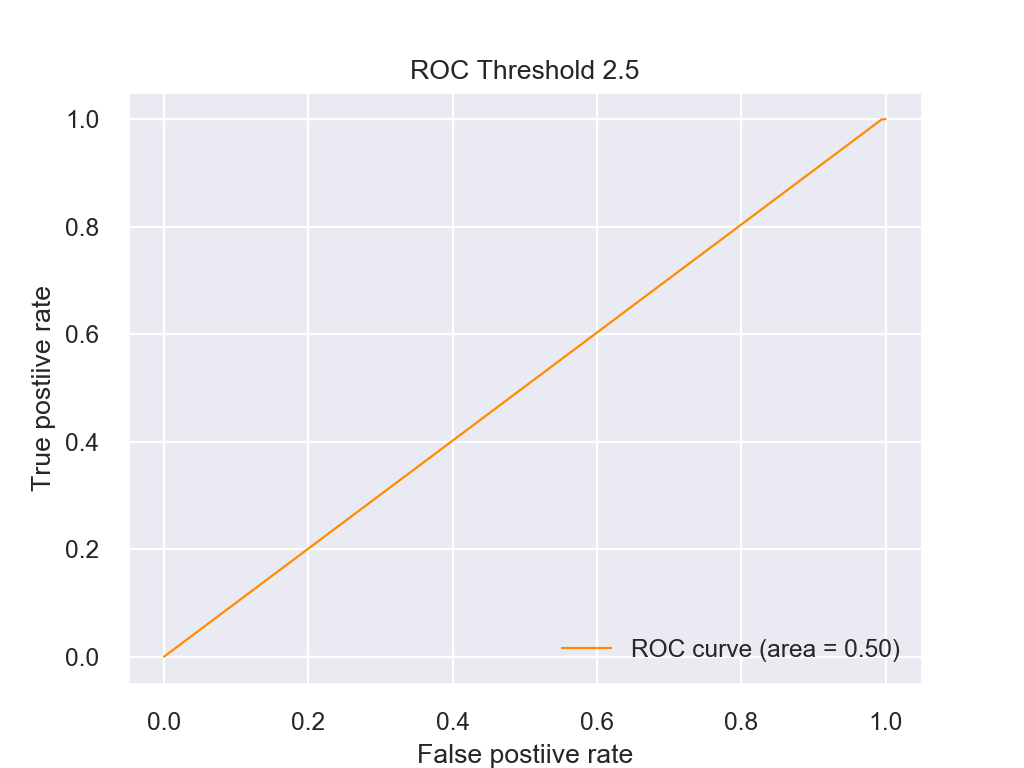

In [537]:
print(classification_report(unb_targets_tst,preds_tst))
visualize(unb_targets_tst,preds_tst)

In [538]:
clf = SVC(gamma='auto')
clf.fit(unb_features_trn, unb_targets_trn)
preds_tst = clf.predict(unb_features_tst)
accu = np.mean(preds_tst==unb_targets_tst)
print('accu_tst_SVC', accu)




accu_tst_SVC 0.9069240196078432


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1519
           1       0.91      1.00      0.95     14801

   micro avg       0.91      0.91      0.91     16320
   macro avg       0.45      0.50      0.48     16320
weighted avg       0.82      0.91      0.86     16320



/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<IPython.core.display.Javascript object>


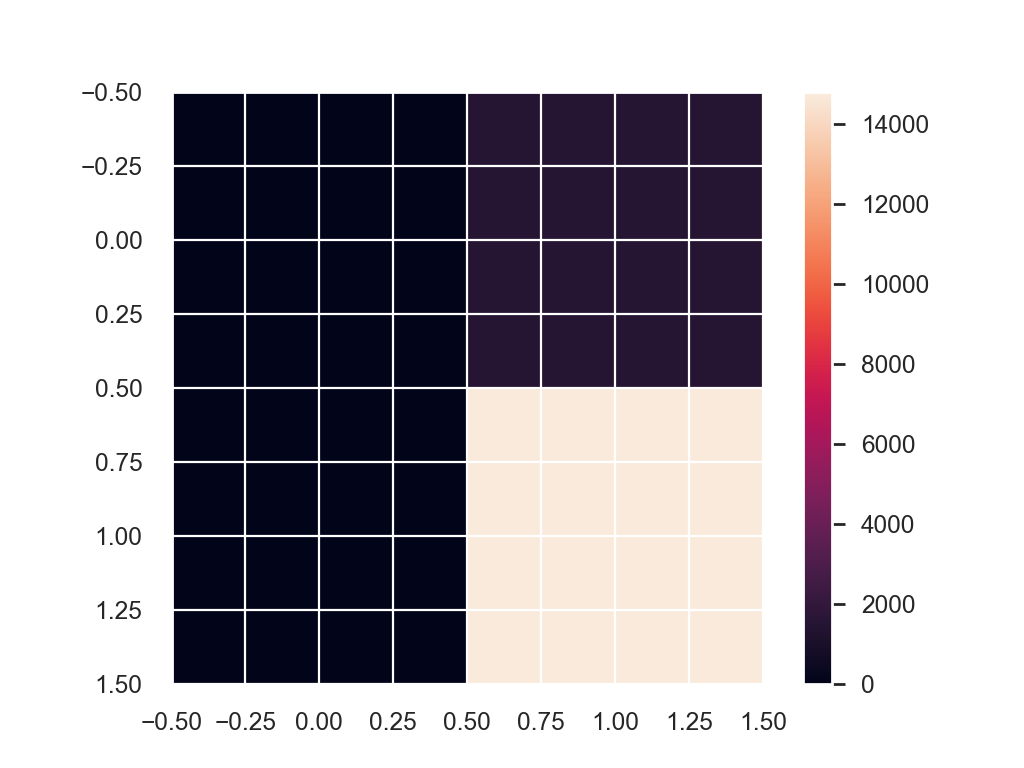

<IPython.core.display.Javascript object>


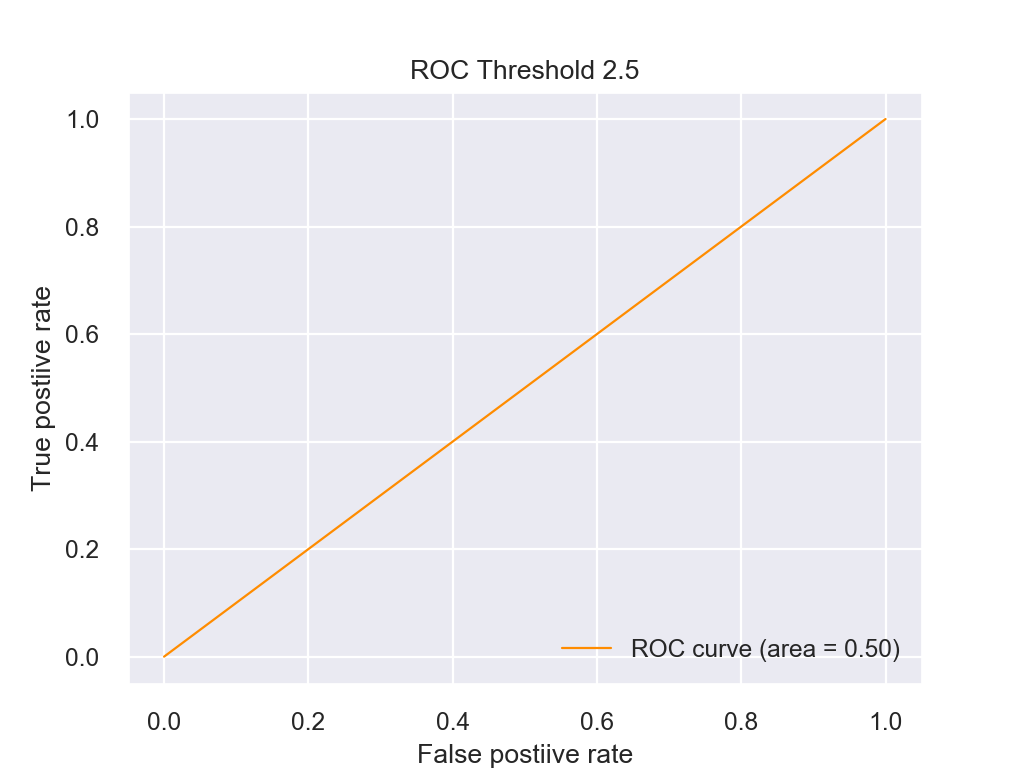

In [540]:
print(classification_report(unb_targets_tst,preds_tst))
visualize(unb_targets_tst,preds_tst)

In [563]:
clf = LogisticRegression(solver='lbfgs', max_iter=200)
clf.fit(unb_features_trn, unb_targets_trn)
preds_tst = clf.predict(unb_features_tst)
accu = np.mean(preds_tst==unb_targets_tst)
print('accu_tst_LR', accu)

accu_tst_LR 0.906311274509804


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.32      0.01      0.01      1519
           1       0.91      1.00      0.95     14801

   micro avg       0.91      0.91      0.91     16320
   macro avg       0.61      0.50      0.48     16320
weighted avg       0.85      0.91      0.86     16320



<IPython.core.display.Javascript object>


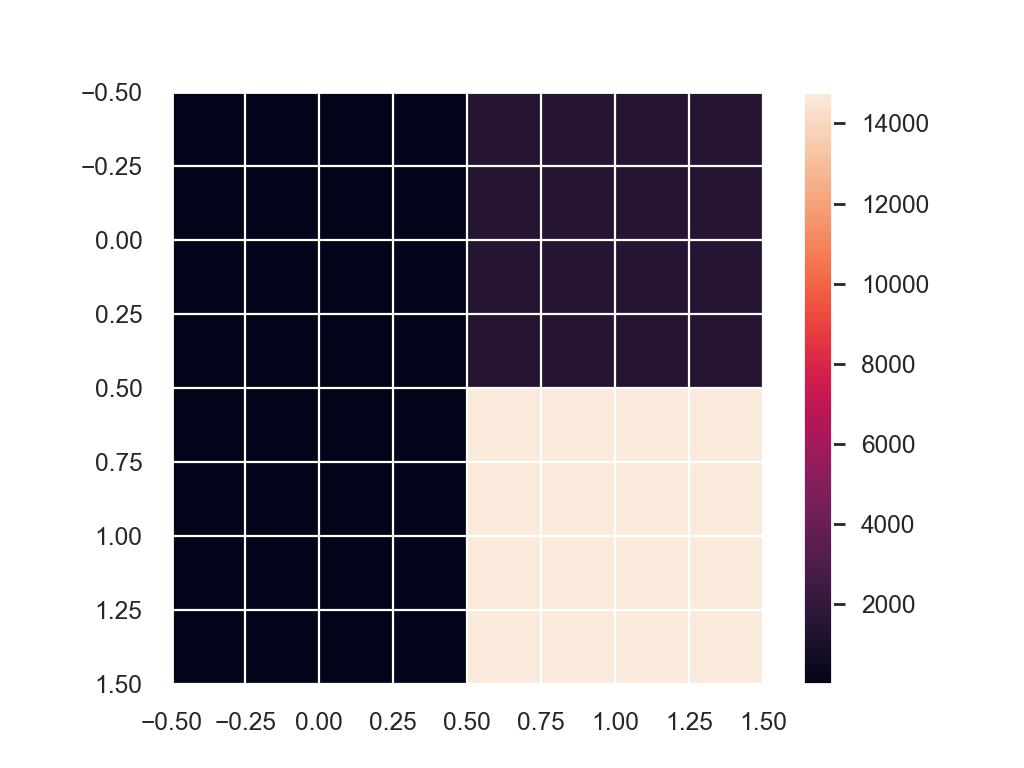

<IPython.core.display.Javascript object>


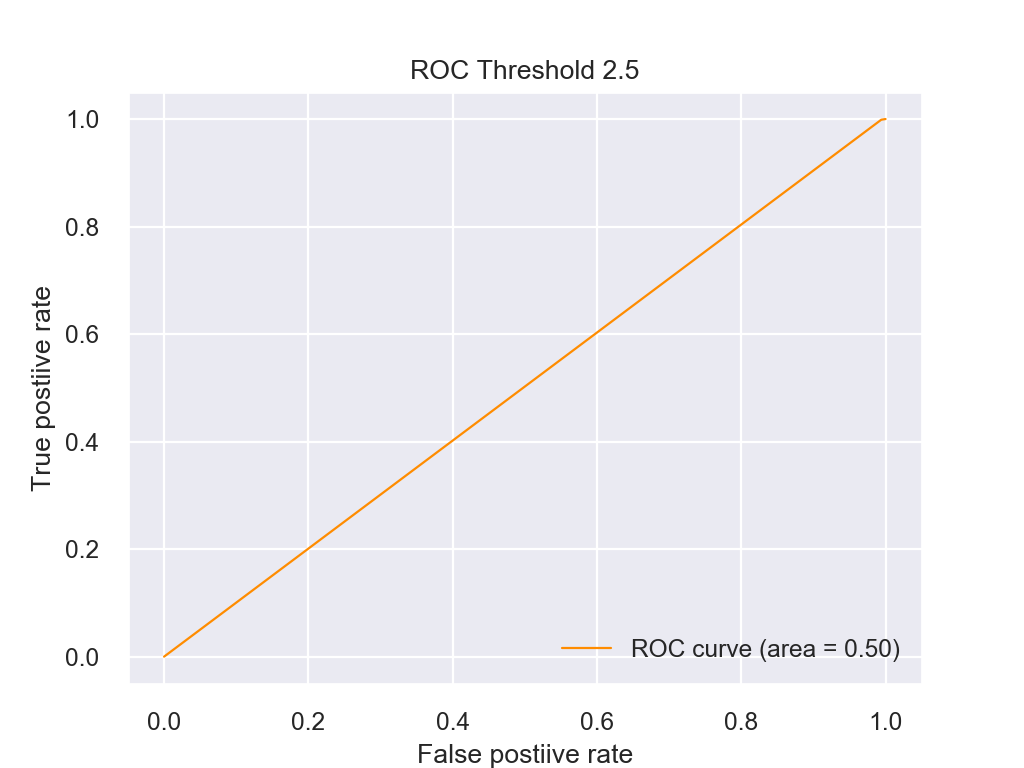

In [564]:
print(classification_report(unb_targets_tst,preds_tst))
visualize(unb_targets_tst,preds_tst)

In [547]:
clf=MLPClassifier(hidden_layer_sizes=(500,200,200,500), activation='relu', solver='adam',
                 max_iter=2000,alpha=0.01,learning_rate_init=5e-7)
clf.fit(unb_features_trn,unb_targets_trn)
preds_tst=clf.predict(unb_features_tst)
preds_tst[preds_tst<0.5] = 0
preds_tst[preds_tst>=0.5] = 1
accu = np.mean(preds_tst==unb_targets_tst)
print('accu_tst_Neural', accu)


accu_tst_Neural 0.9069240196078432


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1519
           1       0.91      1.00      0.95     14801

   micro avg       0.91      0.91      0.91     16320
   macro avg       0.45      0.50      0.48     16320
weighted avg       0.82      0.91      0.86     16320



/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory

<IPython.core.display.Javascript object>


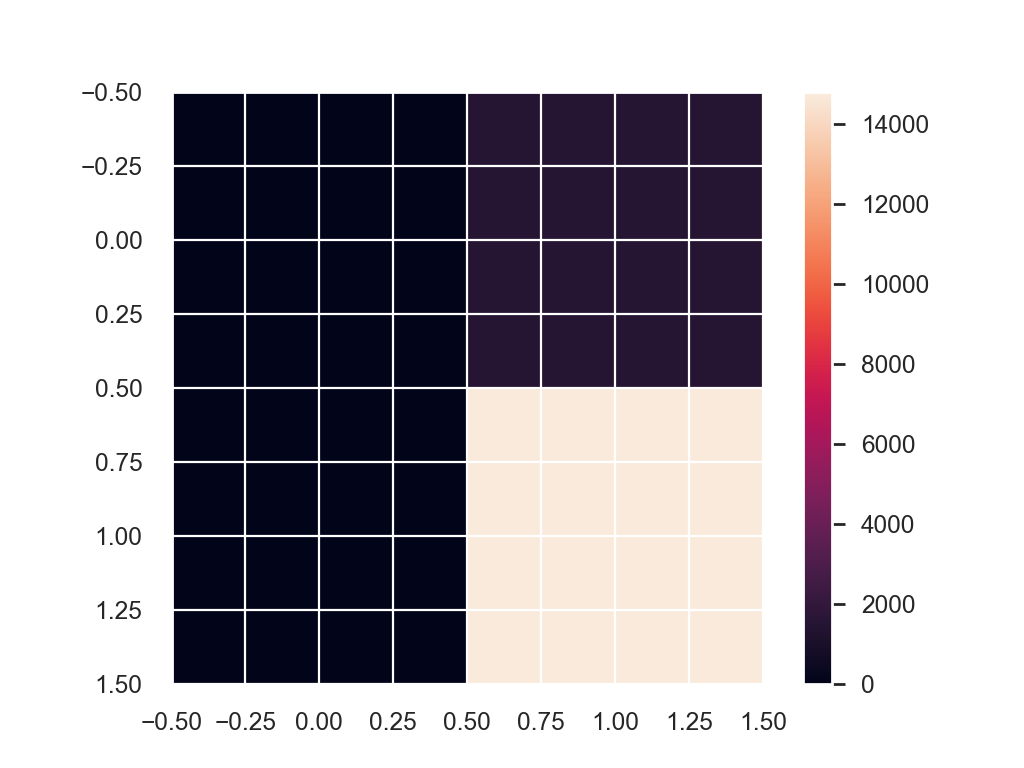

<IPython.core.display.Javascript object>


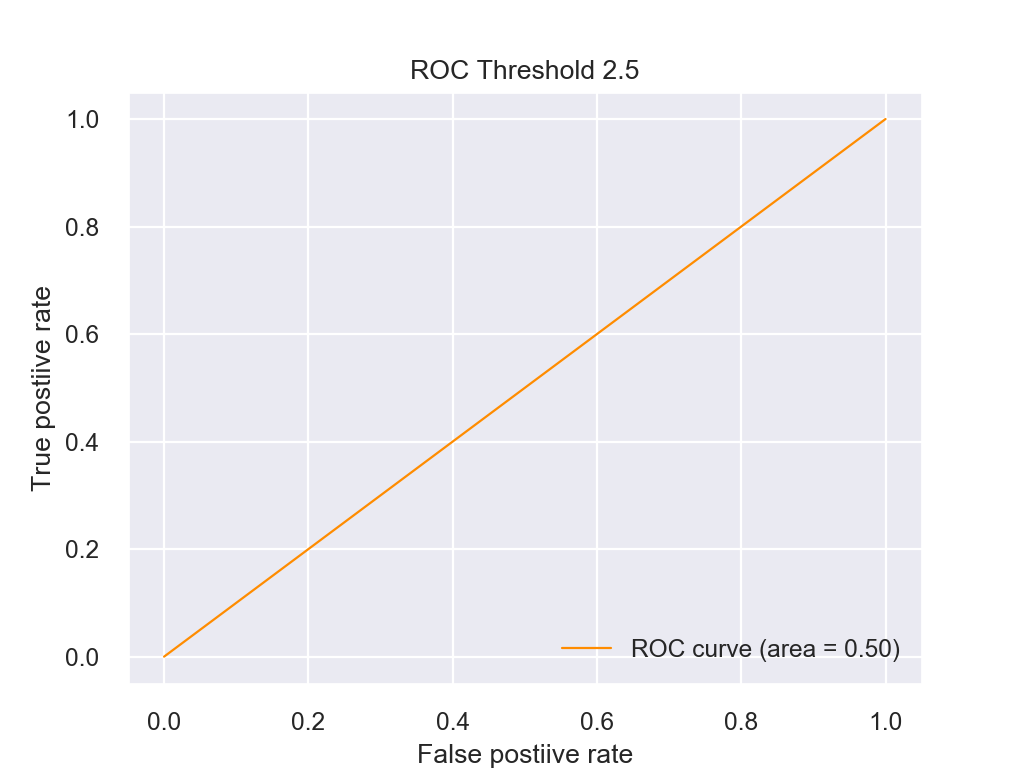

In [548]:
print(classification_report(unb_targets_tst,preds_tst))
visualize(unb_targets_tst,preds_tst)

In [550]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(unb_features_trn, unb_targets_trn)
preds_tst = clf.predict(unb_features_tst)
accu = np.mean(preds_tst==unb_targets_tst)
print('accu_tst_RFC', accu)

accu_tst_RFC 0.9068627450980392


              precision    recall  f1-score   support

           0       0.48      0.01      0.02      1519
           1       0.91      1.00      0.95     14801

   micro avg       0.91      0.91      0.91     16320
   macro avg       0.69      0.50      0.48     16320
weighted avg       0.87      0.91      0.86     16320



/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


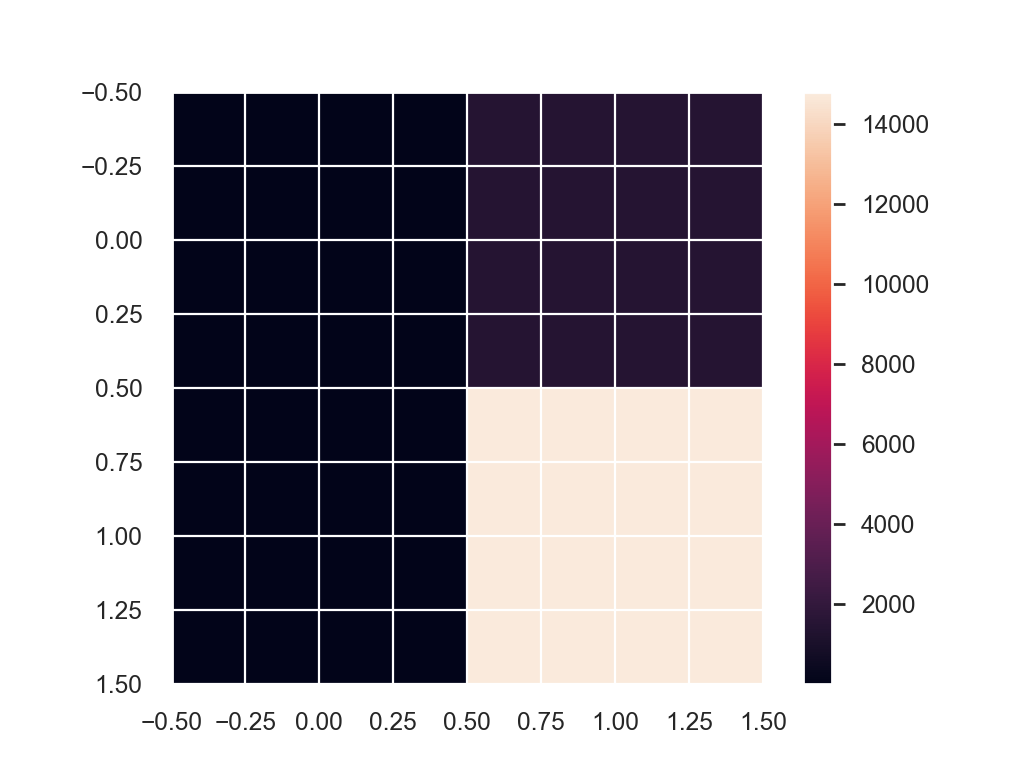

<IPython.core.display.Javascript object>


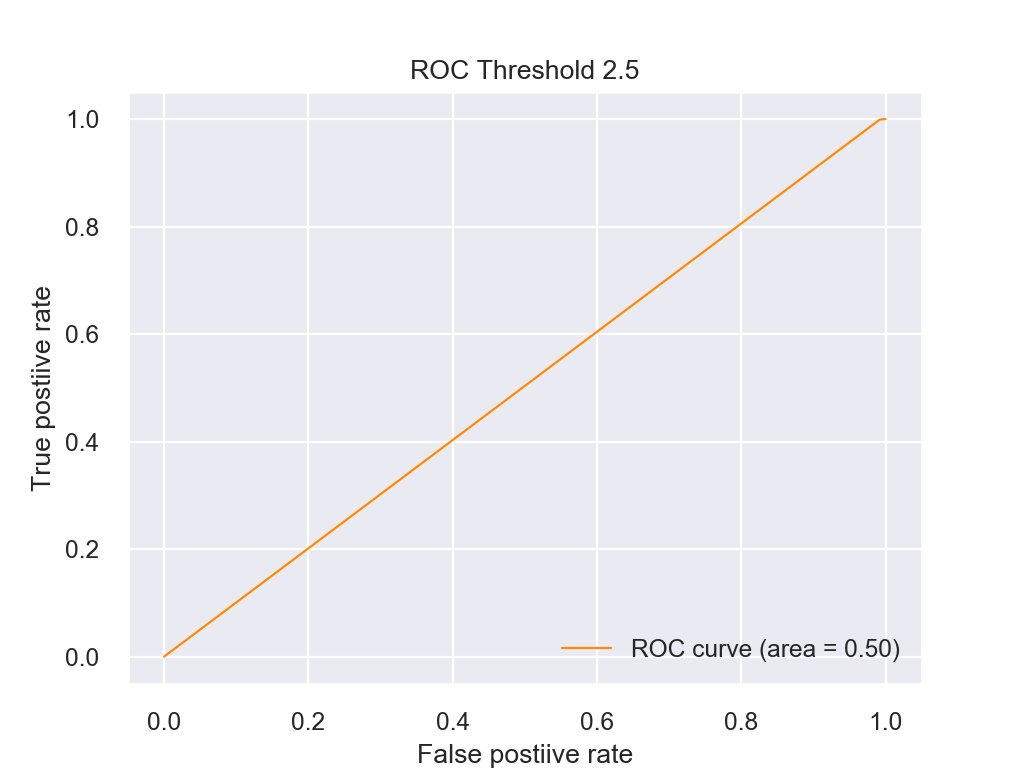

In [551]:
print(classification_report(unb_targets_tst,preds_tst))
visualize(unb_targets_tst,preds_tst)

In [123]:
estimator = clf.estimators_[5]
estimator

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1403648283, splitter='best')

In [ ]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                
                rounded = True, proportion = False, 
                precision = 2, filled = True)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')

In [569]:
clf = GaussianNB(priors=None)
clf.fit(unb_features_trn, unb_targets_trn)
preds_tst = clf.predict(unb_features_tst)
accu = np.mean(preds_tst==unb_targets_tst)
print('accu_tst_SVC', accu)


accu_tst_SVC 0.6667892156862745


              precision    recall  f1-score   support

           0       0.17      0.69      0.28      1528
           1       0.95      0.66      0.78     14792

   micro avg       0.67      0.67      0.67     16320
   macro avg       0.56      0.68      0.53     16320
weighted avg       0.88      0.67      0.74     16320



<IPython.core.display.Javascript object>


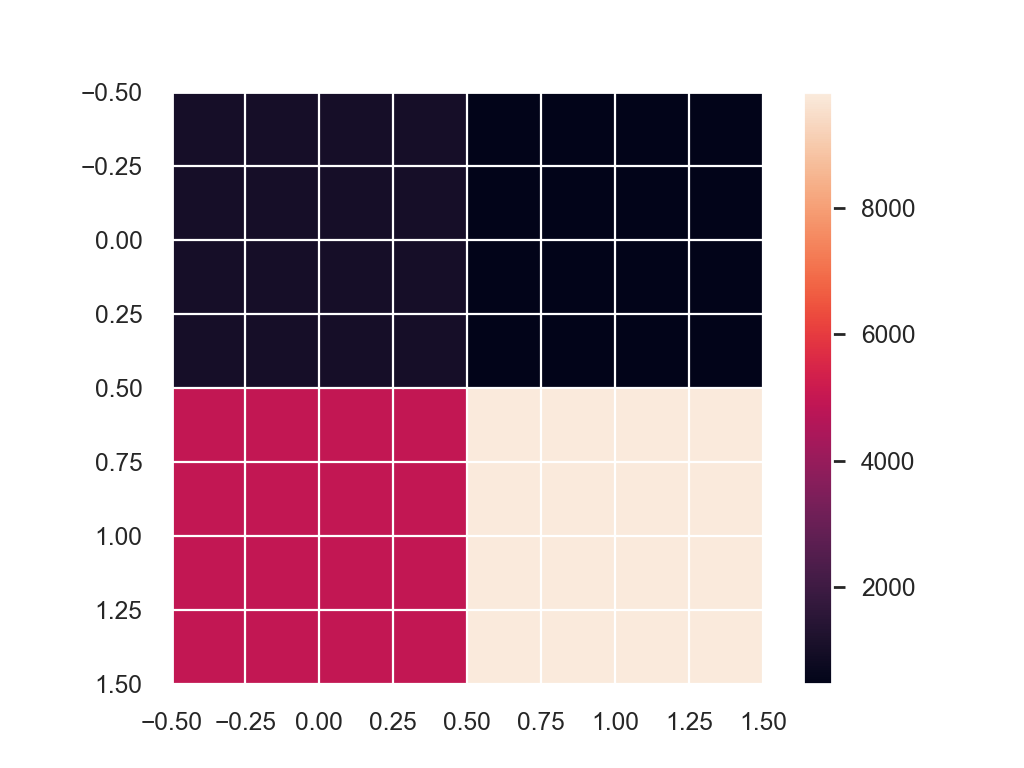

<IPython.core.display.Javascript object>


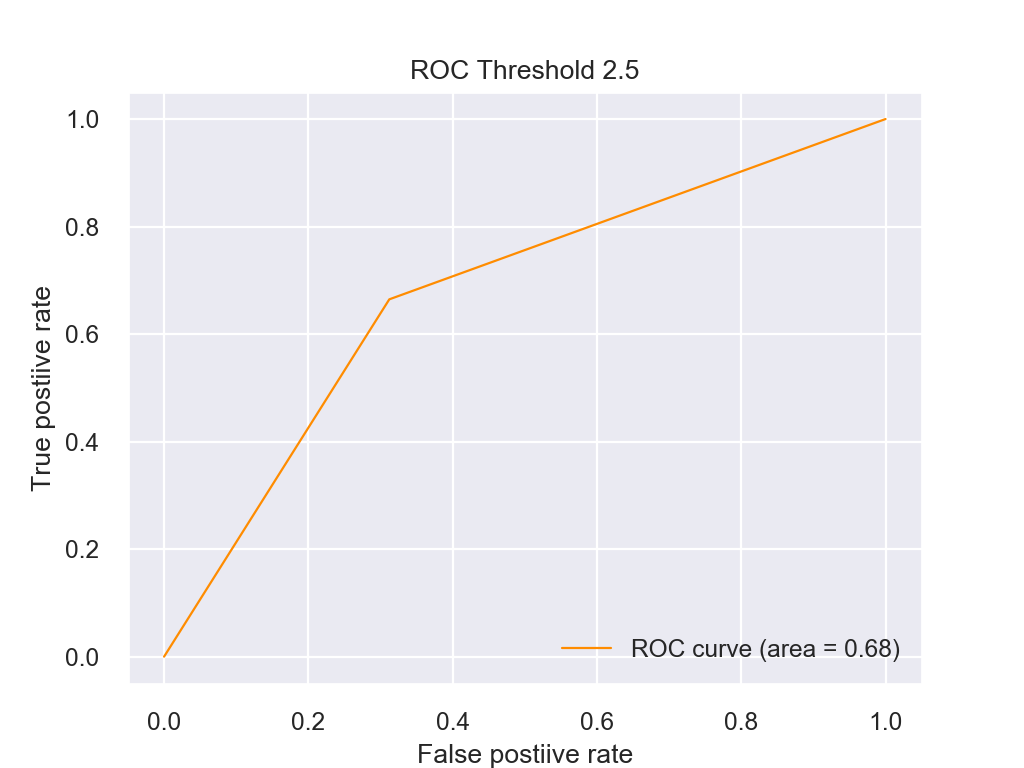

In [571]:
print(classification_report(unb_targets_tst,preds_tst))
visualize(unb_targets_tst,preds_tst)

In [573]:
from sklearn.ensemble import AdaBoostClassifier
#clf = AdaBoostClassifier(LogisticRegression(solver='lbfgs', max_iter=200),n_estimators=50,random_state=42)
clf = AdaBoostClassifier(n_estimators=50,random_state=42)
clf.fit(unb_features_trn, unb_targets_trn)
preds_tst = clf.predict(unb_features_tst)
accu = np.mean(preds_tst==unb_targets_tst)
print('accu_tst_SVC', accu)

accu_tst_SVC 0.9047794117647059


              precision    recall  f1-score   support

           0       0.33      0.02      0.03      1528
           1       0.91      1.00      0.95     14792

   micro avg       0.90      0.90      0.90     16320
   macro avg       0.62      0.51      0.49     16320
weighted avg       0.85      0.90      0.86     16320



<IPython.core.display.Javascript object>


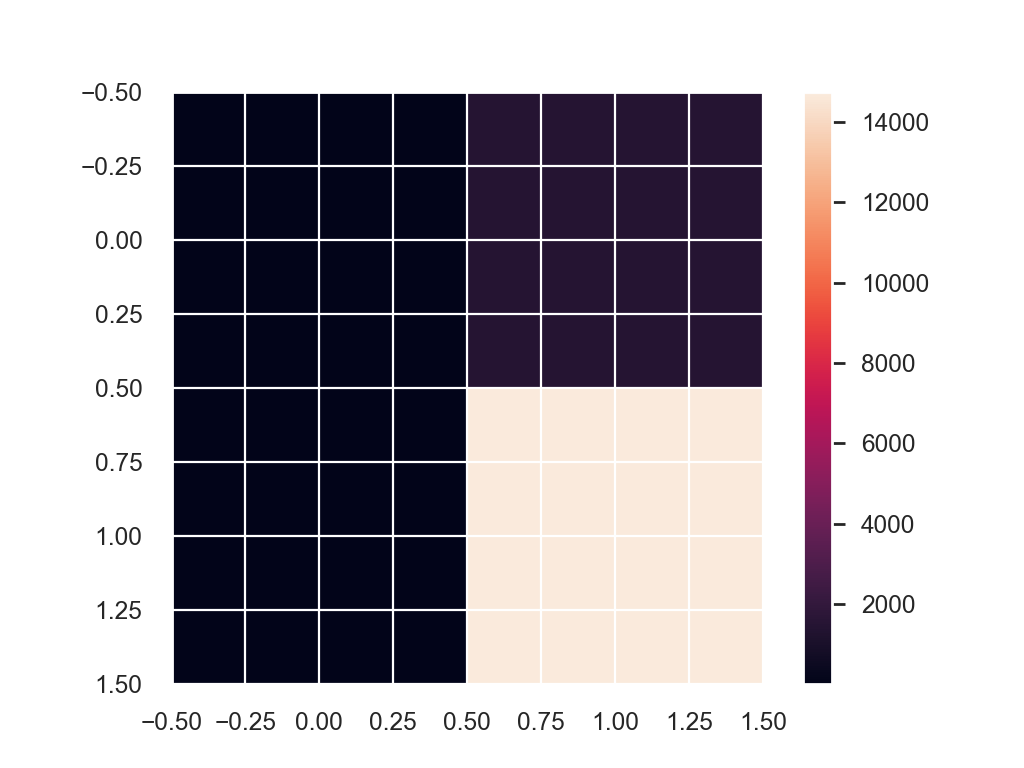

<IPython.core.display.Javascript object>


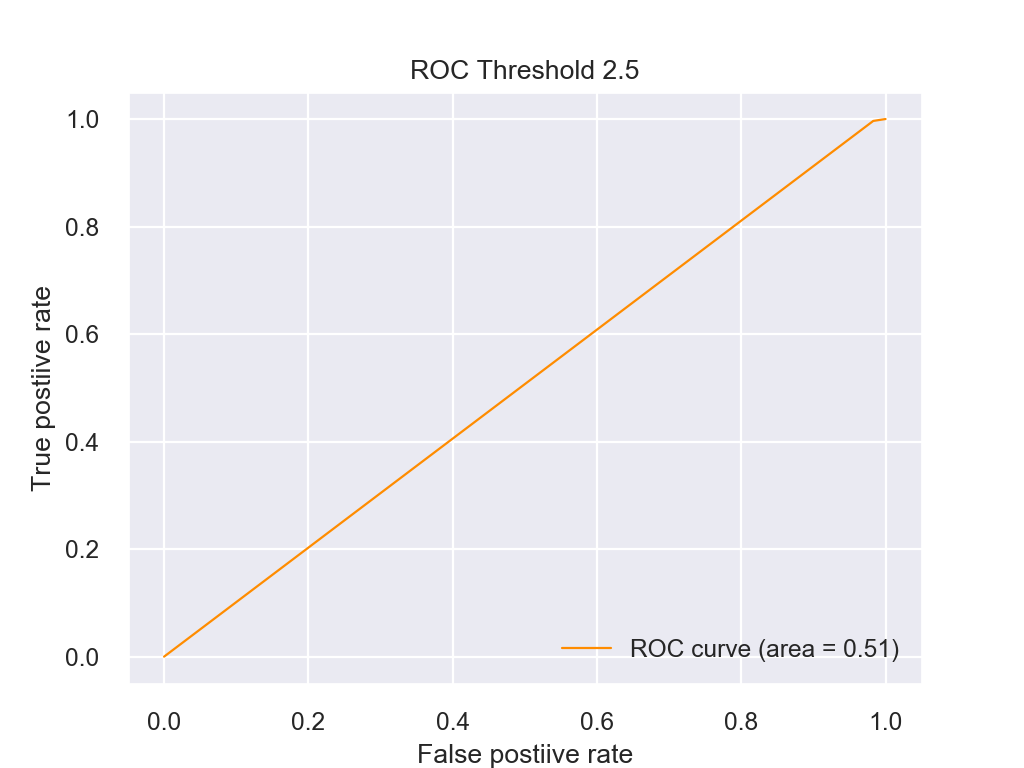

In [574]:
print(classification_report(unb_targets_tst,preds_tst))
visualize(unb_targets_tst,preds_tst)

In [575]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(unb_features_trn, unb_targets_trn)
preds_tst = clf.predict(unb_features_tst)
accu = np.mean(preds_tst==unb_targets_tst)
print('accu_tst_RFC', accu)

accu_tst_RFC 0.8983455882352941


              precision    recall  f1-score   support

           0       0.23      0.04      0.07      1528
           1       0.91      0.99      0.95     14792

   micro avg       0.90      0.90      0.90     16320
   macro avg       0.57      0.51      0.51     16320
weighted avg       0.85      0.90      0.86     16320



<IPython.core.display.Javascript object>


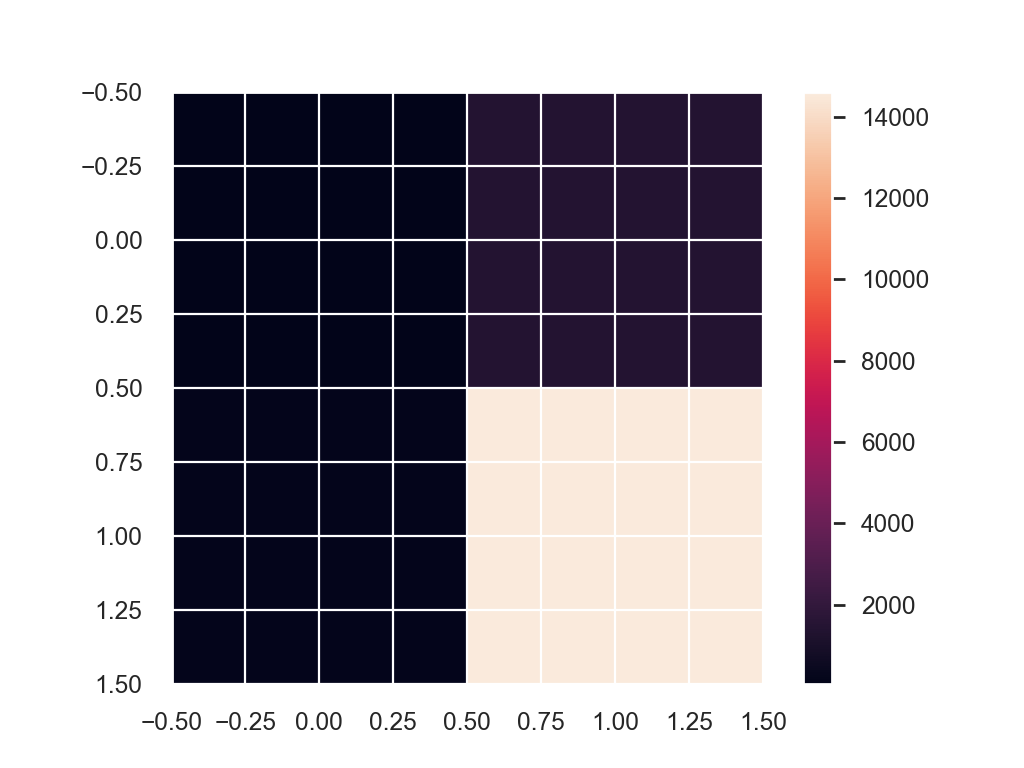

<IPython.core.display.Javascript object>


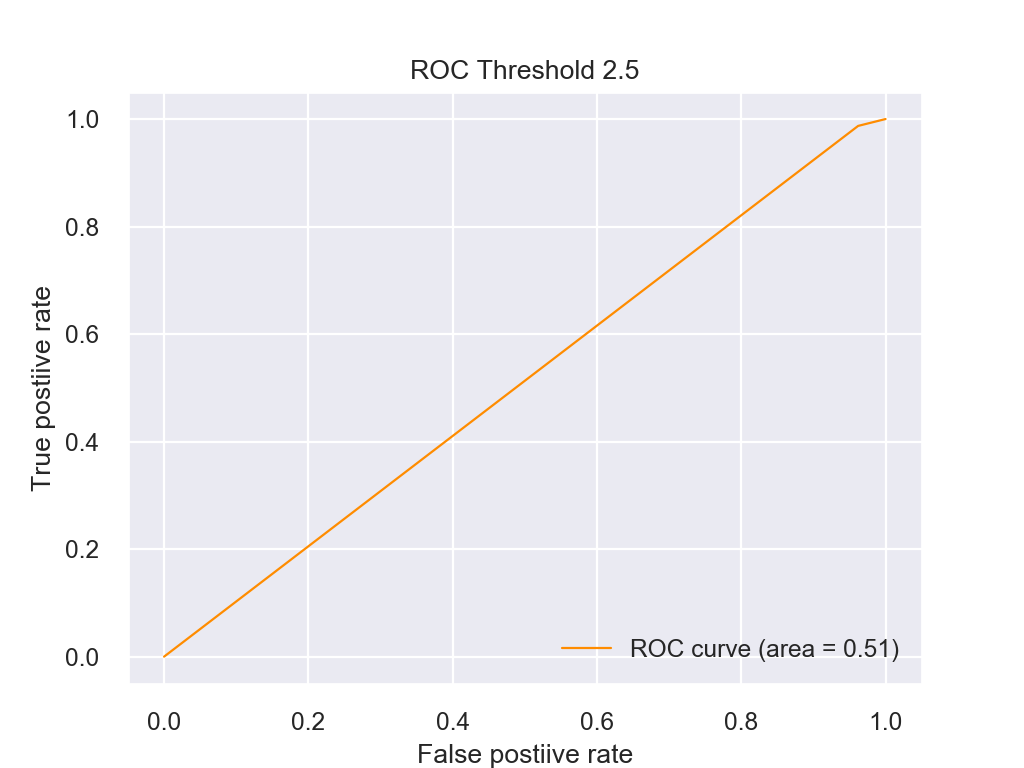

In [576]:
print(classification_report(unb_targets_tst,preds_tst))
visualize(unb_targets_tst,preds_tst)

In [553]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,Embedding,Conv1D

Using TensorFlow backend.


In [582]:
model=Sequential()
model.add(Dense(64, input_dim=89, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(loss='binary_crossentropy', optimizer= 'adam',metrics=['accuracy'])
model.fit(unb_features_trn, unb_targets_trn,epochs=100)



Epoch 1/100
33134/33134 [==============================] - 2s 59us/step - loss: 1.5329 - acc: 0.0069: 1s - loss: 1.6
Epoch 2/100
33134/33134 [==============================] - 1s 42us/step - loss: 1.4675 - acc: 5.4325e-04
Epoch 3/100
33134/33134 [==============================] - 1s 41us/step - loss: 1.4675 - acc: 4.2253e-04
Epoch 4/100
33134/33134 [==============================] - 1s 42us/step - loss: 1.4675 - acc: 4.2253e-04
Epoch 5/100
33134/33134 [==============================] - 2s 47us/step - loss: 1.4675 - acc: 4.2253e-04: 0s - loss: 1.4649 -
Epoch 6/100
33134/33134 [==============================] - 2s 46us/step - loss: 1.4675 - acc: 4.2253e-04
Epoch 7/100
33134/33134 [==============================] - 1s 44us/step - loss: 1.4675 - acc: 4.2253e-04
Epoch 8/100
33134/33134 [==============================] - 2s 46us/step - loss: 1.4675 - acc: 4.2253e-04
Epoch 9/100
33134/33134 [==============================] - 2s 48us/step - loss: 1.4675 - acc: 4.2253e-04
Epoch 10/100
33134/331

33134/33134 [==============================] - 1s 39us/step - loss: 1.4675 - acc: 4.2253e-04
Epoch 78/100
33134/33134 [==============================] - 1s 39us/step - loss: 1.4675 - acc: 4.2253e-04: 0s - loss: 1.4691 - acc: 4.0021e
Epoch 79/100
33134/33134 [==============================] - 1s 43us/step - loss: 1.4675 - acc: 4.2253e-04
Epoch 80/100
33134/33134 [==============================] - 1s 44us/step - loss: 1.4675 - acc: 4.2253e-04
Epoch 81/100
33134/33134 [==============================] - 1s 43us/step - loss: 1.4675 - acc: 4.2253e-04
Epoch 82/100
33134/33134 [==============================] - 1s 39us/step - loss: 1.4675 - acc: 4.2253e-04
Epoch 83/100
33134/33134 [==============================] - 1s 41us/step - loss: 1.4675 - acc: 4.2253e-04
Epoch 84/100
33134/33134 [==============================] - 1s 39us/step - loss: 1.4675 - acc: 4.2253e-04
Epoch 85/100
33134/33134 [==============================] - 1s 42us/step - loss: 1.4675 - acc: 4.2253e-04
Epoch 86/100
33134/33134 

In [583]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 64)                5760      
_________________________________________________________________
dense_29 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_30 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 17        
Total params: 8,385
Trainable params: 8,385
Non-trainable params: 0
_________________________________________________________________


Visualization

In [90]:
def visualize(targets_tst,preds_tst):
    cm = confusion_matrix(targets_tst,preds_tst)
    fig, ax = plt.subplots()
    im = ax.imshow(cm)
    ax.figure.colorbar(im, ax=ax)
    plt.show()
    fpr, tpr, _ = roc_curve(targets_tst,preds_tst)
    roc_auc=auc(fpr,tpr)
    plt.figure()
    plt.plot(fpr, tpr,color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.title('ROC Threshold 2.5')
    plt.xlabel('False postiive rate')
    plt.ylabel('True postiive rate')
    plt.legend(loc="lower right")
    plt.show()
